In [1]:
%matplotlib inline
#
# data manipulation and math
#
import numpy as np
#import scipy as sp
import pandas as pd
#
# plotting and visualization
#
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
#
import seaborn as sns
#
#This is for multiple output on Jupyter Notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print("Loaded Libraries")

Loaded Libraries


In [2]:
#Setting Pandas and Matplotlib Options and Color Definitions
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#
plt.rcParams['figure.figsize'] = (3, 3)
plt.rcParams['figure.dpi'] = 150      
#
c0 = sns.color_palette()[0]
c1 = sns.color_palette()[1]
c2 = sns.color_palette()[2]
#
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Define pastel color palette
pastel_palette = sns.color_palette("pastel")

# Extract colors from pastel palette
c0 = pastel_palette[0]
c1 = pastel_palette[1]
c2 = pastel_palette[2]

In [3]:
#Loading Data and Displaying Information
data= pd.read_csv('E:/Springboard Data Scientist BootCamp/PYTHON/GITHUB/HousePricePrediction/Data/data_wrangling.csv')

print('The data have ', data.shape[0], ' rows and ', data.shape[1], ' columns\n')
print('column names: \n')
print('\n'.join(list(data.columns)))

The data have  1449  rows and  78  columns

column names: 

Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
Fence
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice


In [4]:
data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Fence,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,No Masonry,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Fence,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Fence,0,9,2008,WD,Normal,223500


In [5]:
data = data.drop('Id', axis = 1)

In [6]:
data.tail(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1446,70,RL,66.000,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,No Masonry,0.000,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.000,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,GdPrv,2500,5,2010,WD,Normal,266500
1447,20,RL,68.000,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,No Masonry,0.000,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,No Fireplace,Attchd,1950.000,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,No Fence,0,4,2010,WD,Normal,142125
1448,20,RL,75.000,9937,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,No Masonry,0.000,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,No Fireplace,Attchd,1965.000,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,No Fence,0,6,2008,WD,Normal,147500


In [7]:
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

In [8]:
# Numerical Columns
num_cols = data.select_dtypes(include = ['float64', 'int64']).columns
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [9]:
# Categorical Columns
cat_cols = data.select_dtypes(include = ['object']).columns
cat_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

          MSZoning  Ratio %
MSZoning                   
RL            1146   79.089
RM             212   14.631
FV              65    4.486
RH              16    1.104
C (all)         10    0.690


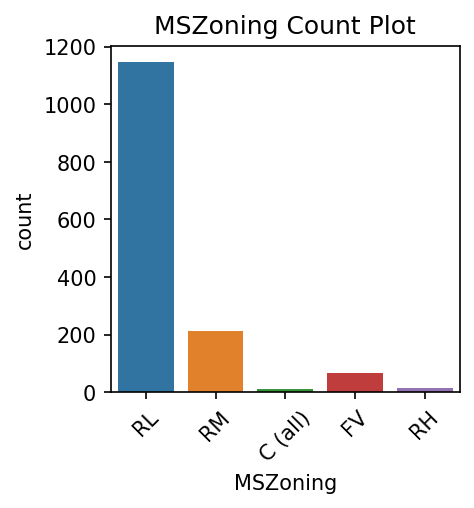

        Street  Ratio %
Street                 
Pave      1444   99.655
Grvl         5    0.345


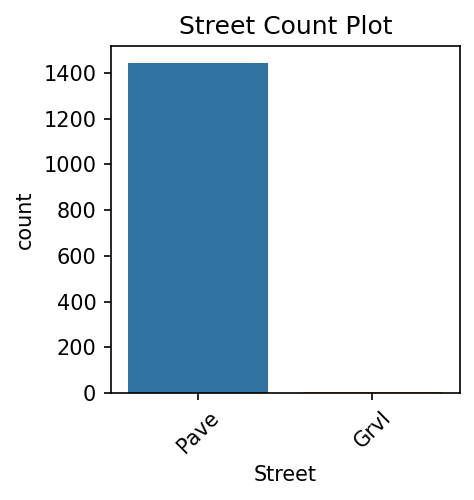

          LotShape  Ratio %
LotShape                   
Reg            919   63.423
IR1            482   33.264
IR2             39    2.692
IR3              9    0.621


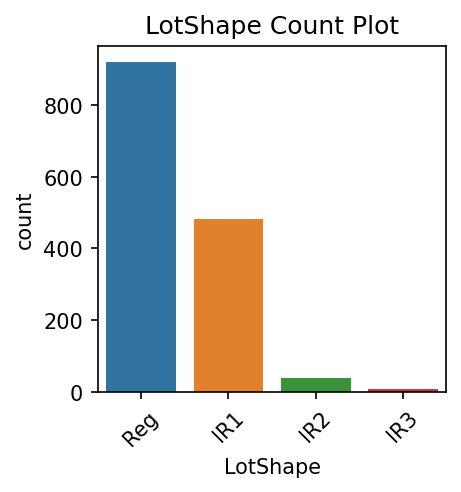

             LandContour  Ratio %
LandContour                      
Lvl                 1304   89.993
Bnk                   63    4.348
HLS                   49    3.382
Low                   33    2.277


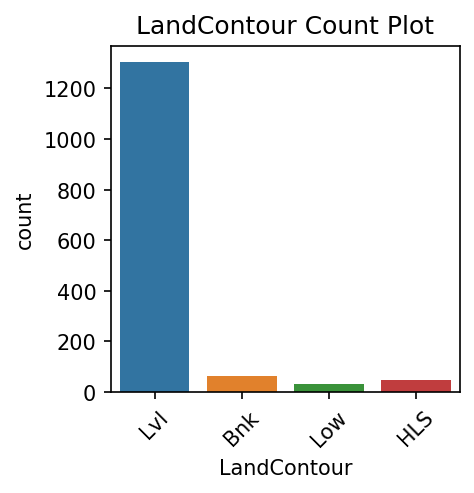

           Utilities  Ratio %
Utilities                    
AllPub          1448   99.931
NoSeWa             1    0.069


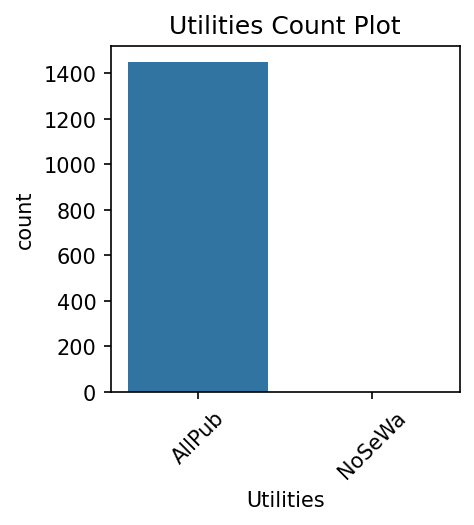

           LotConfig  Ratio %
LotConfig                    
Inside          1047   72.257
Corner           259   17.874
CulDSac           92    6.349
FR2               47    3.244
FR3                4    0.276


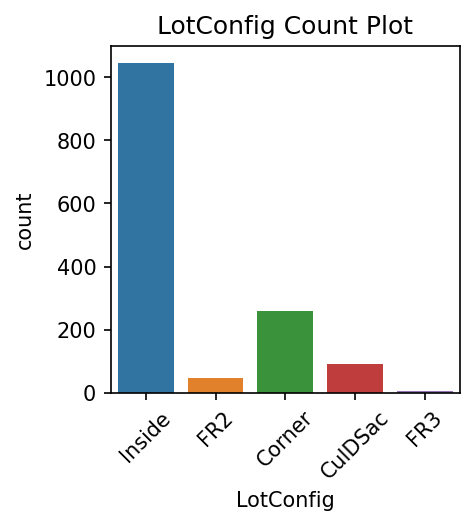

           LandSlope  Ratio %
LandSlope                    
Gtl             1375   94.893
Mod               65    4.486
Sev                9    0.621


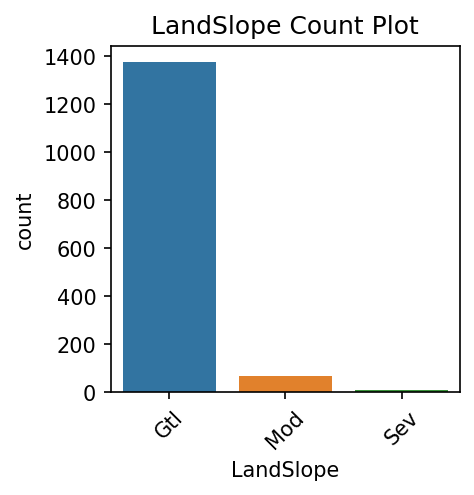

              Neighborhood  Ratio %
Neighborhood                       
NAmes                  225   15.528
CollgCr                150   10.352
OldTown                107    7.384
Edwards                100    6.901
Somerst                 86    5.935
Gilbert                 79    5.452
NridgHt                 77    5.314
Sawyer                  73    5.038
NWAmes                  73    5.038
SawyerW                 59    4.072
BrkSide                 58    4.003
Crawfor                 51    3.520
Mitchel                 49    3.382
NoRidge                 41    2.830
IDOTRR                  37    2.553
Timber                  36    2.484
ClearCr                 26    1.794
StoneBr                 25    1.725
SWISU                   25    1.725
MeadowV                 17    1.173
Blmngtn                 17    1.173
BrDale                  16    1.104
Veenker                 11    0.759
NPkVill                  9    0.621
Blueste                  2    0.138


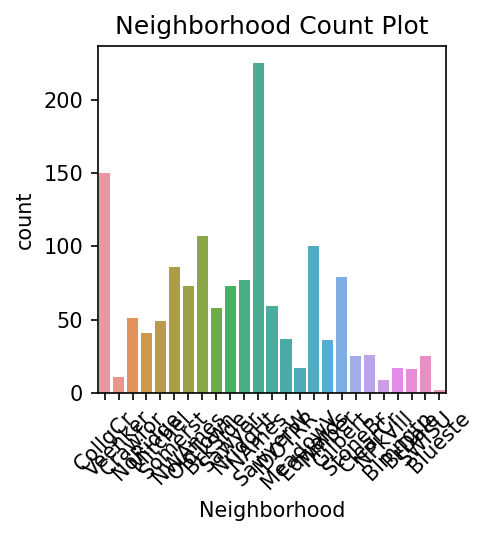

            Condition1  Ratio %
Condition1                     
Norm              1252   86.404
Feedr               80    5.521
Artery              46    3.175
RRAn                26    1.794
PosN                19    1.311
RRAe                11    0.759
PosA                 8    0.552
RRNn                 5    0.345
RRNe                 2    0.138


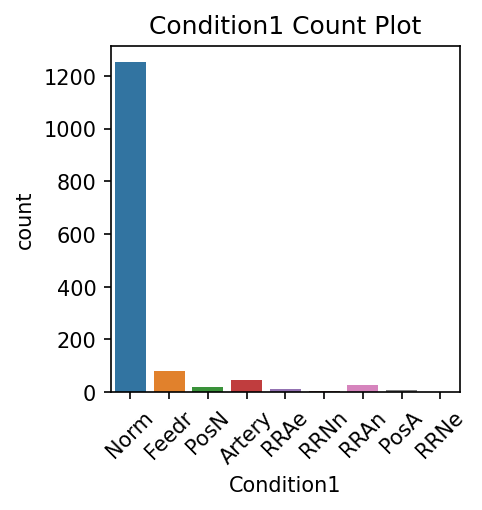

            Condition2  Ratio %
Condition2                     
Norm              1434   98.965
Feedr                6    0.414
Artery               2    0.138
RRNn                 2    0.138
PosN                 2    0.138
PosA                 1    0.069
RRAn                 1    0.069
RRAe                 1    0.069


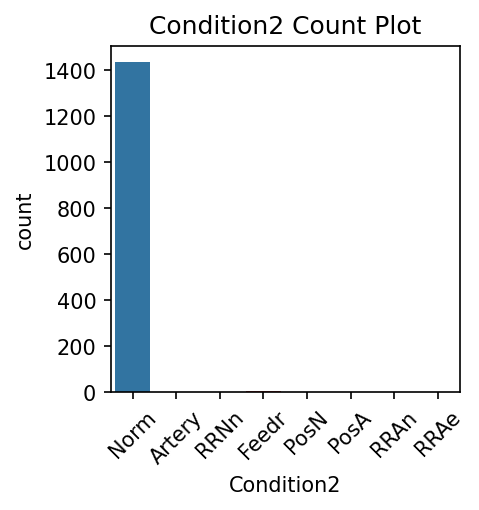

          BldgType  Ratio %
BldgType                   
1Fam          1210   83.506
TwnhsE         114    7.867
Duplex          52    3.589
Twnhs           43    2.968
2fmCon          30    2.070


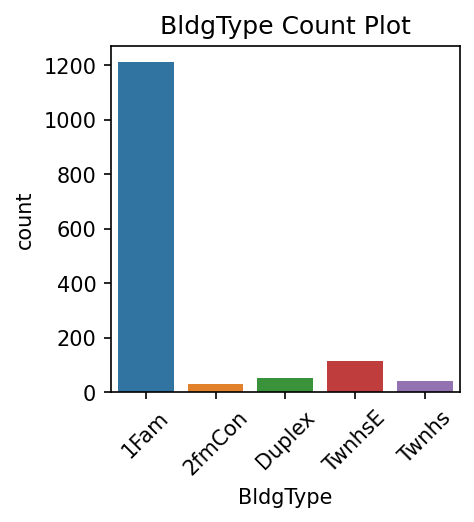

            HouseStyle  Ratio %
HouseStyle                     
1Story             724   49.965
2Story             440   30.366
1.5Fin             151   10.421
SLvl                65    4.486
SFoyer              37    2.553
1.5Unf              14    0.966
2.5Unf              11    0.759
2.5Fin               7    0.483


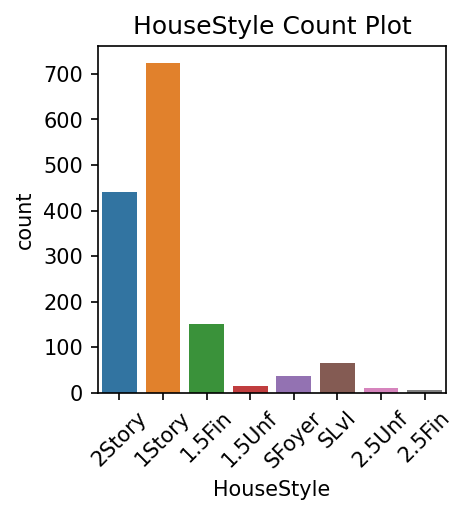

           RoofStyle  Ratio %
RoofStyle                    
Gable           1132   78.123
Hip              285   19.669
Flat              13    0.897
Gambrel           11    0.759
Mansard            6    0.414
Shed               2    0.138


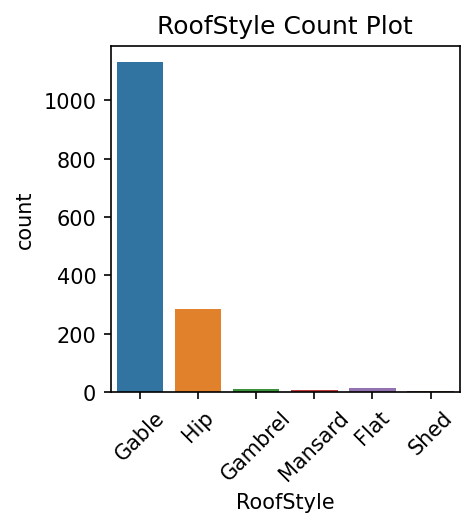

          RoofMatl  Ratio %
RoofMatl                   
CompShg       1423   98.206
Tar&Grv         11    0.759
WdShngl          6    0.414
WdShake          5    0.345
Metal            1    0.069
Membran          1    0.069
Roll             1    0.069
ClyTile          1    0.069


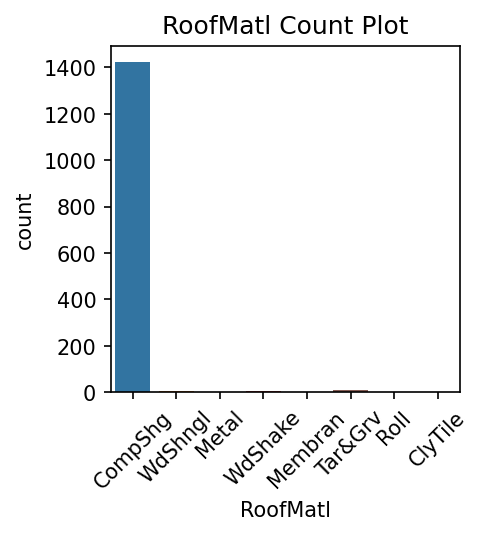

             Exterior1st  Ratio %
Exterior1st                      
VinylSd              513   35.404
HdBoard              222   15.321
MetalSd              219   15.114
Wd Sdng              203   14.010
Plywood              106    7.315
CemntBd               60    4.141
BrkFace               49    3.382
WdShing               26    1.794
Stucco                24    1.656
AsbShng               20    1.380
BrkComm                2    0.138
Stone                  2    0.138
AsphShn                1    0.069
ImStucc                1    0.069
CBlock                 1    0.069


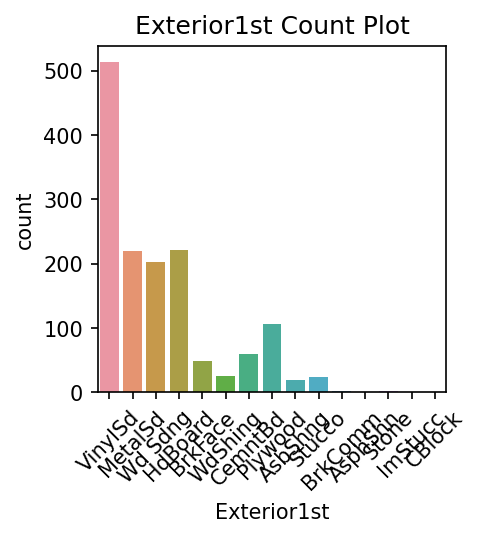

             Exterior2nd  Ratio %
Exterior2nd                      
VinylSd              502   34.645
MetalSd              213   14.700
HdBoard              206   14.217
Wd Sdng              195   13.458
Plywood              140    9.662
CmentBd               59    4.072
Wd Shng               38    2.622
Stucco                25    1.725
BrkFace               24    1.656
AsbShng               20    1.380
ImStucc               10    0.690
Brk Cmn                7    0.483
Stone                  5    0.345
AsphShn                3    0.207
Other                  1    0.069
CBlock                 1    0.069


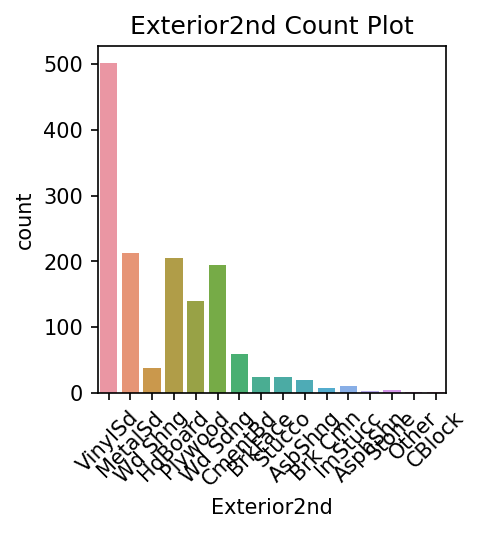

            MasVnrType  Ratio %
MasVnrType                     
No Masonry         863   59.558
BrkFace            445   30.711
Stone              127    8.765
BrkCmn              14    0.966


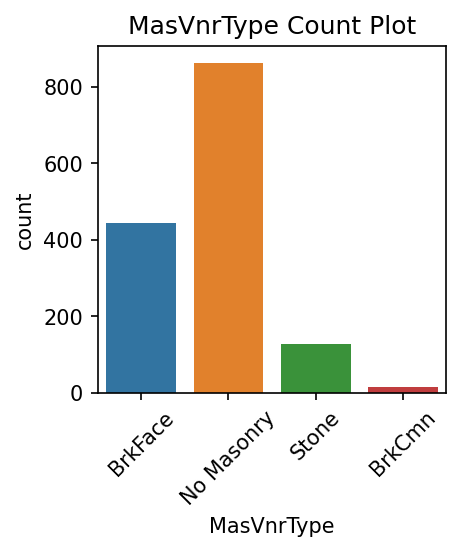

           ExterQual  Ratio %
ExterQual                    
TA               898   61.974
Gd               485   33.471
Ex                52    3.589
Fa                14    0.966


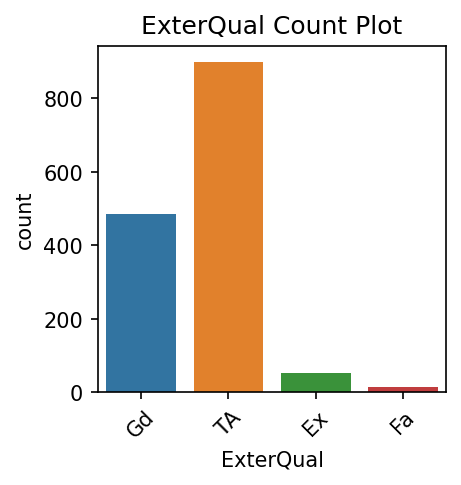

           ExterCond  Ratio %
ExterCond                    
TA              1274   87.923
Gd               143    9.869
Fa                28    1.932
Ex                 3    0.207
Po                 1    0.069


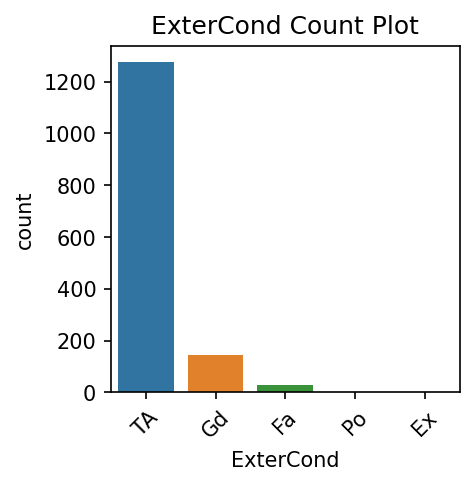

            Foundation  Ratio %
Foundation                     
PConc              647   44.651
CBlock             629   43.409
BrkTil             141    9.731
Slab                24    1.656
Stone                5    0.345
Wood                 3    0.207


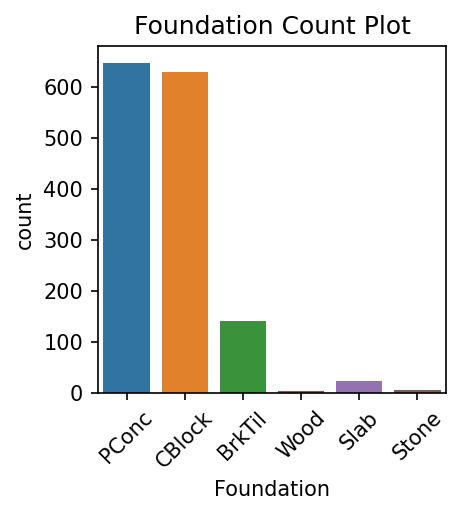

             BsmtQual  Ratio %
BsmtQual                      
TA                642   44.306
Gd                615   42.443
Ex                121    8.351
No Basement        37    2.553
Fa                 34    2.346


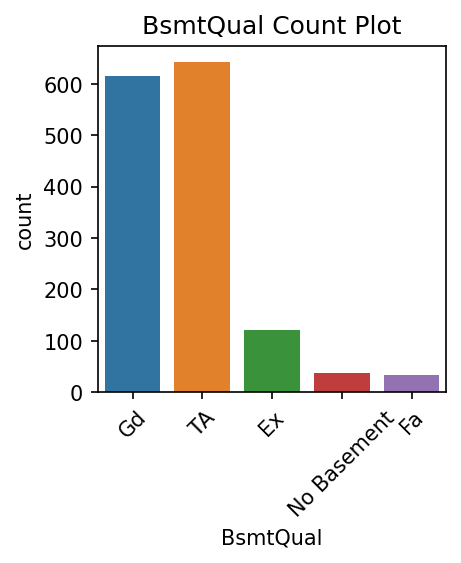

             BsmtCond  Ratio %
BsmtCond                      
TA               1303   89.924
Gd                 65    4.486
Fa                 42    2.899
No Basement        37    2.553
Po                  2    0.138


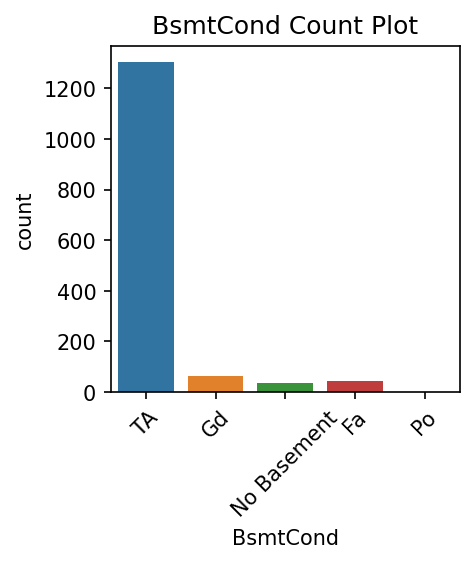

              BsmtExposure  Ratio %
BsmtExposure                       
No                     947   65.355
Av                     221   15.252
Gd                     130    8.972
Mn                     113    7.798
No Basement             38    2.622


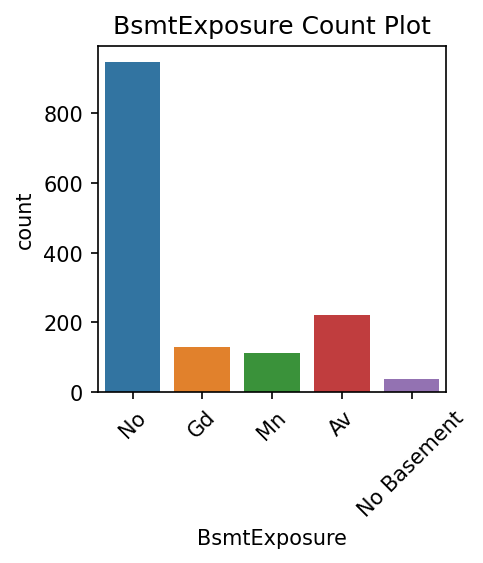

              BsmtFinType1  Ratio %
BsmtFinType1                       
Unf                    425   29.331
GLQ                    417   28.778
ALQ                    218   15.045
BLQ                    147   10.145
Rec                    132    9.110
LwQ                     73    5.038
No Basement             37    2.553


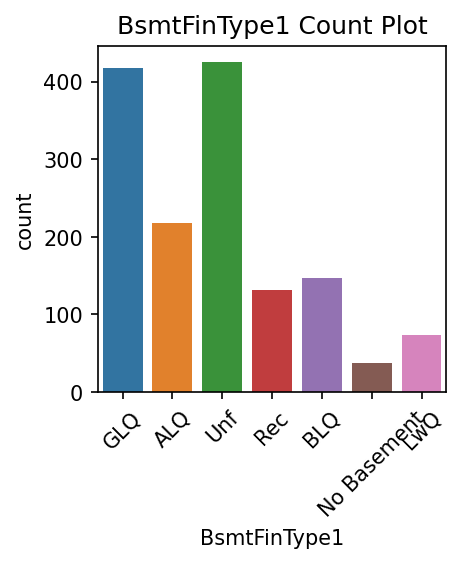

              BsmtFinType2  Ratio %
BsmtFinType2                       
Unf                   1247   86.059
Rec                     53    3.658
LwQ                     46    3.175
No Basement             38    2.622
BLQ                     32    2.208
ALQ                     19    1.311
GLQ                     14    0.966


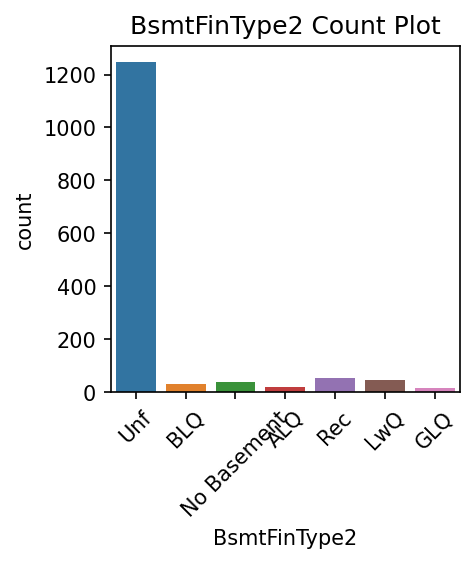

         Heating  Ratio %
Heating                  
GasA        1421   98.068
GasW          15    1.035
Grav           7    0.483
Wall           4    0.276
OthW           1    0.069
Floor          1    0.069


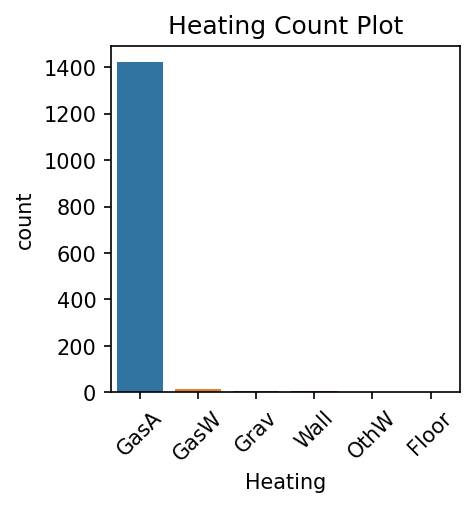

           HeatingQC  Ratio %
HeatingQC                    
Ex               739   51.001
TA               423   29.193
Gd               238   16.425
Fa                48    3.313
Po                 1    0.069


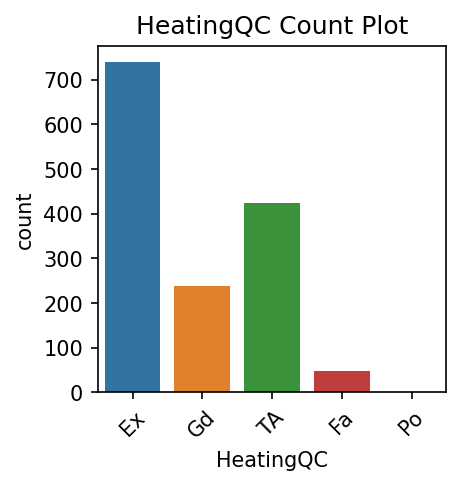

            CentralAir  Ratio %
CentralAir                     
Y                 1357   93.651
N                   92    6.349


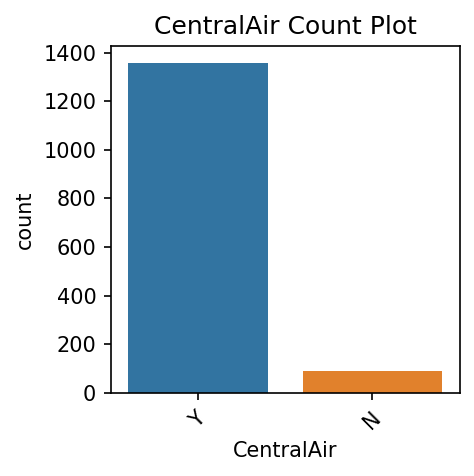

            Electrical  Ratio %
Electrical                     
SBrkr             1325   91.442
FuseA               93    6.418
FuseF               27    1.863
FuseP                3    0.207
Mix                  1    0.069


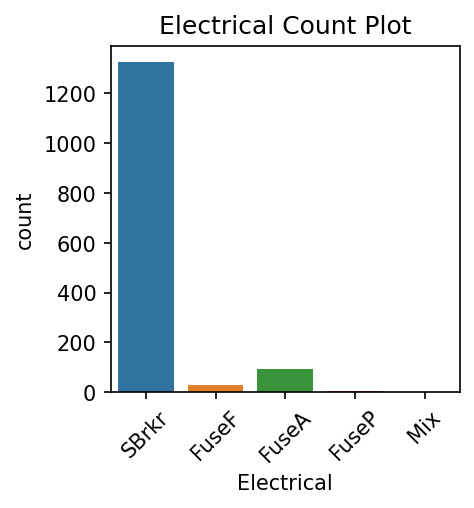

             KitchenQual  Ratio %
KitchenQual                      
TA                   731   50.449
Gd                   581   40.097
Ex                    99    6.832
Fa                    38    2.622


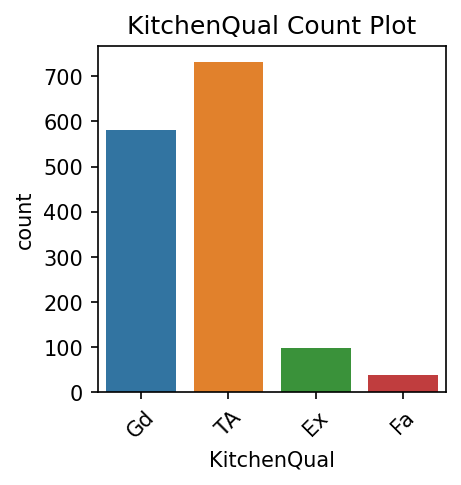

            Functional  Ratio %
Functional                     
Typ               1349   93.099
Min2                34    2.346
Min1                31    2.139
Mod                 15    1.035
Maj1                14    0.966
Maj2                 5    0.345
Sev                  1    0.069


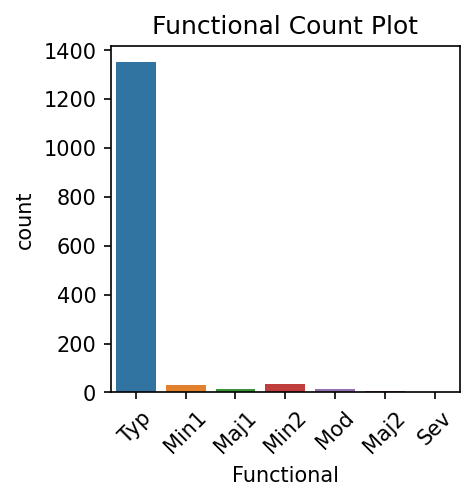

              FireplaceQu  Ratio %
FireplaceQu                       
No Fireplace          686   47.343
Gd                    376   25.949
TA                    311   21.463
Fa                     33    2.277
Ex                     23    1.587
Po                     20    1.380


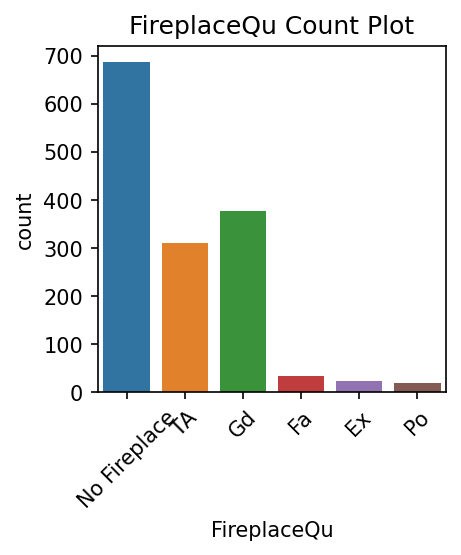

            GarageType  Ratio %
GarageType                     
Attchd             864   59.627
Detchd             384   26.501
BuiltIn             88    6.073
No Garage           79    5.452
Basment             19    1.311
CarPort              9    0.621
2Types               6    0.414


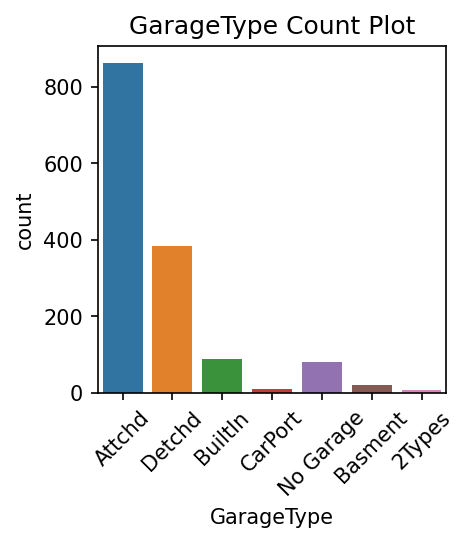

              GarageFinish  Ratio %
GarageFinish                       
Unf                    599   41.339
RFn                    421   29.055
Fin                    350   24.155
No Garage               79    5.452


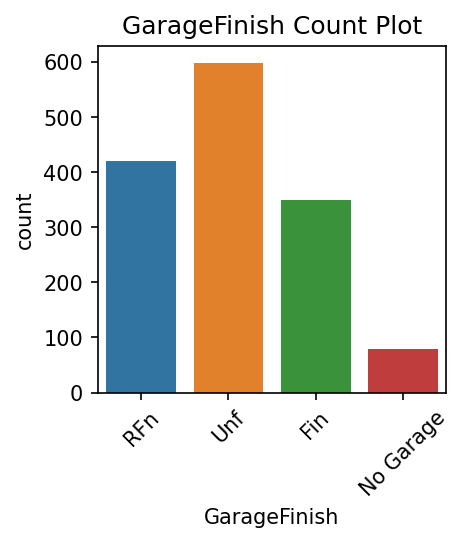

            GarageQual  Ratio %
GarageQual                     
TA                1304   89.993
No Garage           79    5.452
Fa                  46    3.175
Gd                  14    0.966
Ex                   3    0.207
Po                   3    0.207


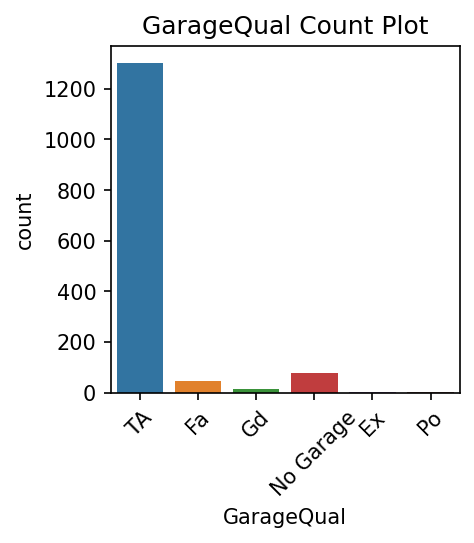

            GarageCond  Ratio %
GarageCond                     
TA                1318   90.959
No Garage           79    5.452
Fa                  35    2.415
Gd                   9    0.621
Po                   6    0.414
Ex                   2    0.138


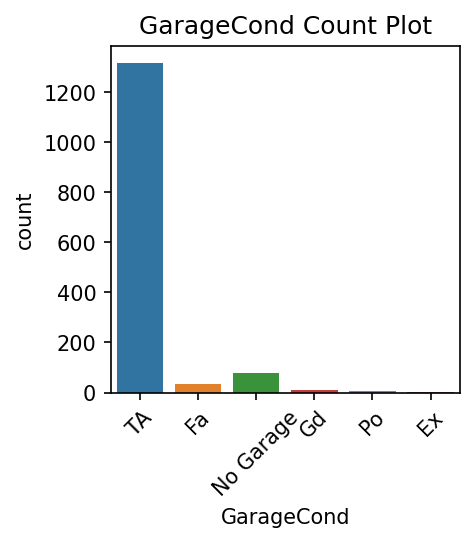

            PavedDrive  Ratio %
PavedDrive                     
Y                 1334   92.063
N                   86    5.935
P                   29    2.001


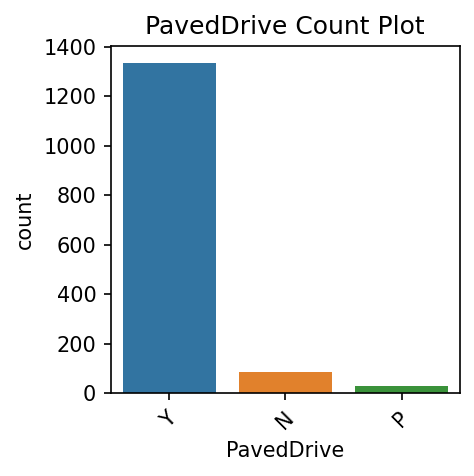

          Fence  Ratio %
Fence                   
No Fence   1169   80.676
MnPrv       156   10.766
GdPrv        59    4.072
GdWo         54    3.727
MnWw         11    0.759


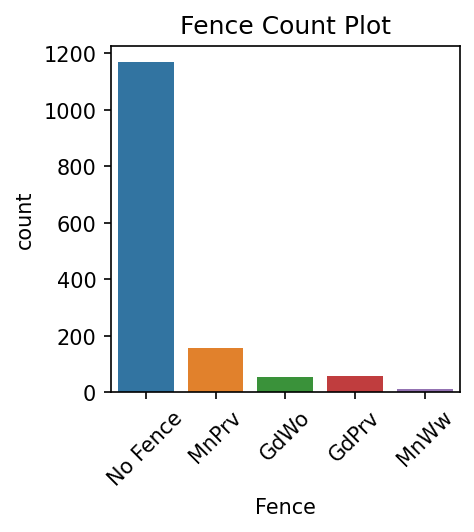

          SaleType  Ratio %
SaleType                   
WD            1256   86.680
New            122    8.420
COD             43    2.968
ConLD            9    0.621
ConLI            5    0.345
ConLw            5    0.345
CWD              4    0.276
Oth              3    0.207
Con              2    0.138


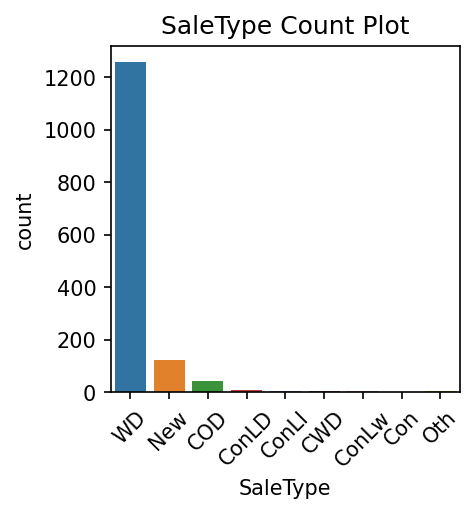

               SaleCondition  Ratio %
SaleCondition                        
Normal                  1188   81.988
Partial                  125    8.627
Abnorml                  100    6.901
Family                    20    1.380
Alloca                    12    0.828
AdjLand                    4    0.276


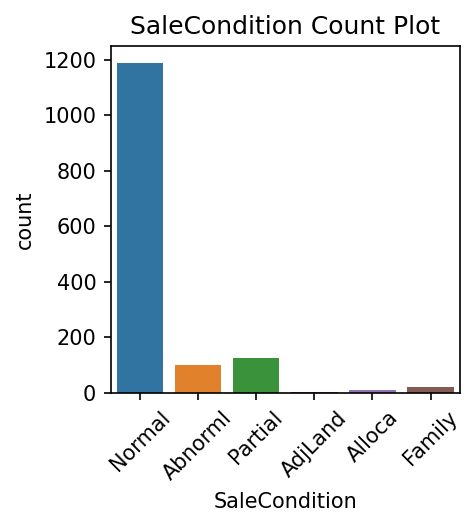

In [10]:
# Analysis of Categorical Variables

def cat_summary(df, col_name, plot=True):
    print(pd.DataFrame({col_name: df[col_name].value_counts(),
                       "Ratio %": 100 * df[col_name].value_counts() / len(df)}))
  
    if plot:
        sns.countplot(x=df[col_name], data=df)
        plt.title(col_name + ' Count Plot')
        plt.xticks(rotation=45)
        plt.show()

for col in cat_cols:
    cat_summary(data, col)

##### MSSubClass ##### 

count   1449.000
mean      56.808
std       42.284
min       20.000
5%        20.000
10%       20.000
20%       20.000
30%       20.000
40%       30.000
50%       50.000
60%       60.000
70%       60.000
80%       80.000
90%      120.000
95%      160.000
99%      190.000
max      190.000
Name: MSSubClass, dtype: float64


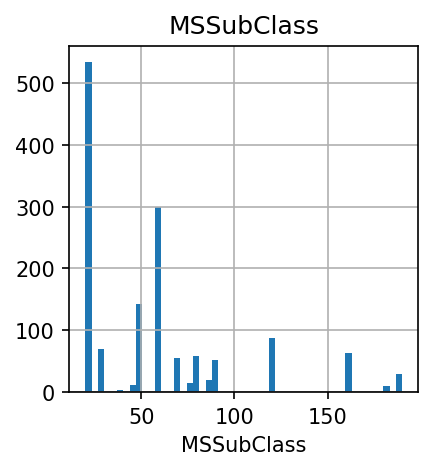

##### LotFrontage ##### 

count   1449.000
mean      69.791
std       21.942
min       21.000
5%        35.400
10%       49.000
20%       59.000
30%       60.000
40%       68.000
50%       69.000
60%       70.000
70%       75.000
80%       80.000
90%       92.000
95%      103.600
99%      135.560
max      313.000
Name: LotFrontage, dtype: float64


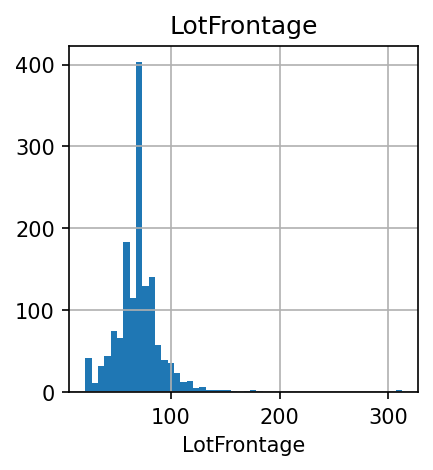

##### LotArea ##### 

count    1449.000
mean    10091.281
std      5652.224
min      1300.000
5%       3264.400
10%      5000.000
20%      7074.800
30%      8054.600
40%      8777.600
50%      9464.000
60%     10185.200
70%     11040.000
80%     12172.800
90%     14236.000
95%     16987.800
99%     33698.640
max     70761.000
Name: LotArea, dtype: float64


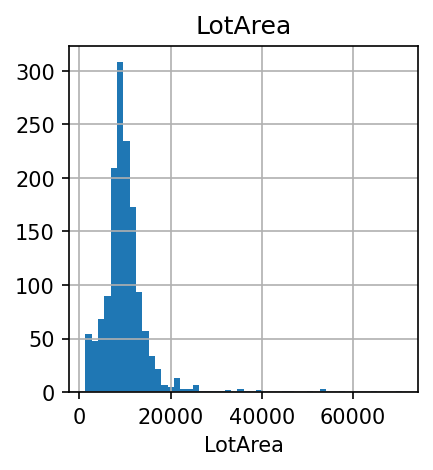

##### OverallQual ##### 

count   1449.000
mean       6.097
std        1.385
min        1.000
5%         4.000
10%        5.000
20%        5.000
30%        5.000
40%        6.000
50%        6.000
60%        6.000
70%        7.000
80%        7.000
90%        8.000
95%        8.000
99%       10.000
max       10.000
Name: OverallQual, dtype: float64


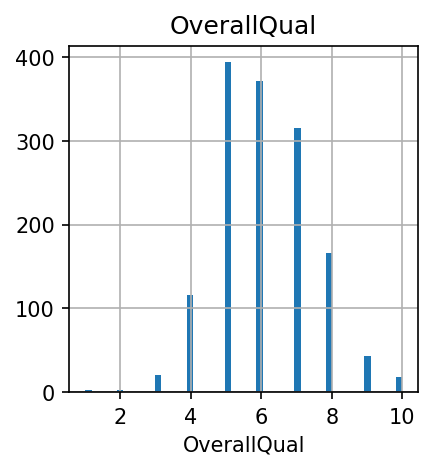

##### OverallCond ##### 

count   1449.000
mean       5.569
std        1.105
min        1.000
5%         4.000
10%        5.000
20%        5.000
30%        5.000
40%        5.000
50%        5.000
60%        5.000
70%        6.000
80%        7.000
90%        7.000
95%        8.000
99%        9.000
max        9.000
Name: OverallCond, dtype: float64


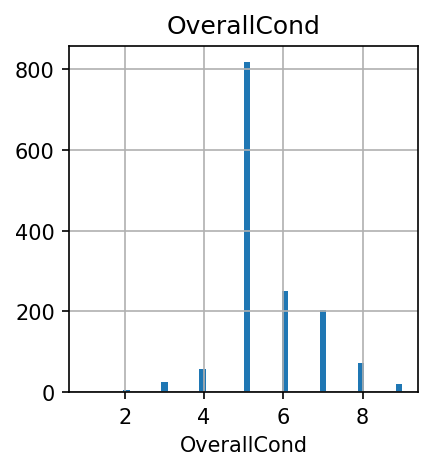

##### YearBuilt ##### 

count   1449.000
mean    1971.734
std       29.615
min     1885.000
5%      1918.000
10%     1925.000
20%     1948.000
30%     1958.000
40%     1965.200
50%     1973.000
60%     1984.000
70%     1998.000
80%     2003.000
90%     2006.000
95%     2007.000
99%     2009.000
max     2010.000
Name: YearBuilt, dtype: float64


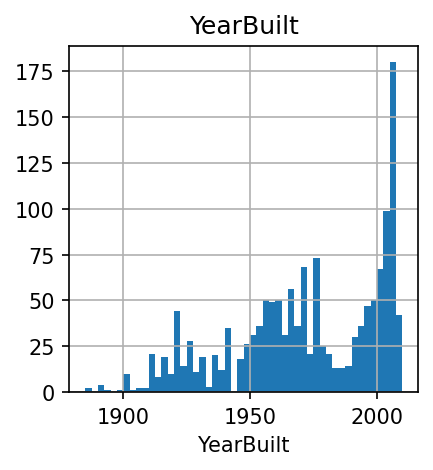

##### YearRemodAdd ##### 

count   1449.000
mean    1984.852
std       20.665
min     1950.000
5%      1950.000
10%     1950.000
20%     1961.000
30%     1971.000
40%     1980.000
50%     1994.000
60%     1998.000
70%     2002.000
80%     2005.000
90%     2006.200
95%     2007.000
99%     2009.000
max     2010.000
Name: YearRemodAdd, dtype: float64


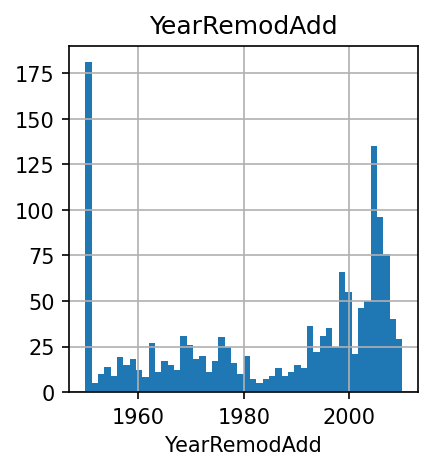

##### MasVnrArea ##### 

count   1449.000
mean     103.332
std      180.857
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%       16.000
70%      116.600
80%      205.400
90%      333.400
95%      454.400
99%      792.160
max     1600.000
Name: MasVnrArea, dtype: float64


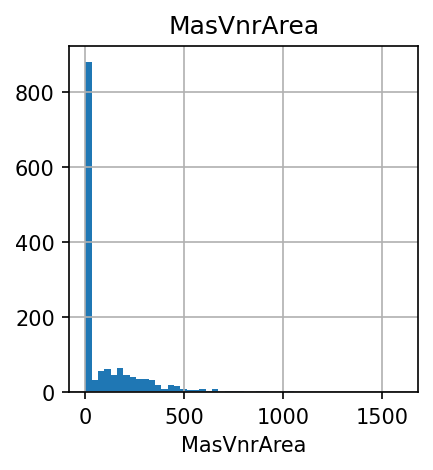

##### BsmtFinSF1 ##### 

count   1449.000
mean     443.643
std      455.550
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%      220.000
50%      384.000
60%      527.200
70%      655.000
80%      804.800
90%     1064.200
95%     1274.000
99%     1572.520
max     5644.000
Name: BsmtFinSF1, dtype: float64


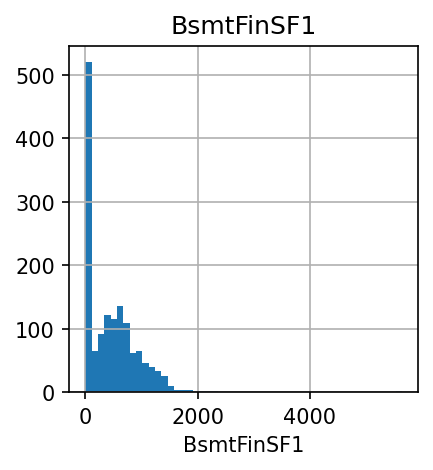

##### BsmtFinSF2 ##### 

count   1449.000
mean      46.235
std      160.586
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%      117.000
95%      394.000
99%      832.360
max     1474.000
Name: BsmtFinSF2, dtype: float64


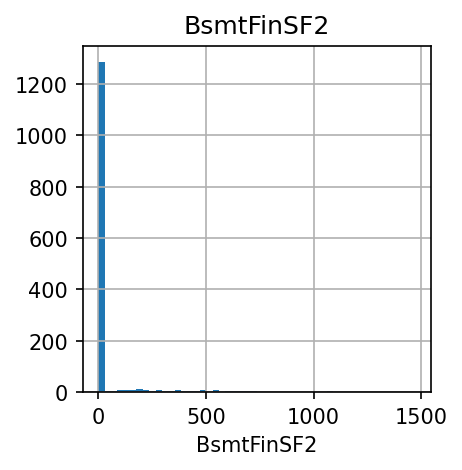

##### BsmtUnfSF ##### 

count   1449.000
mean     566.293
std      441.938
min        0.000
5%         0.000
10%       73.600
20%      172.000
30%      279.400
40%      372.400
50%      474.000
60%      602.000
70%      734.600
80%      896.000
90%     1228.800
95%     1464.400
99%     1797.600
max     2336.000
Name: BsmtUnfSF, dtype: float64


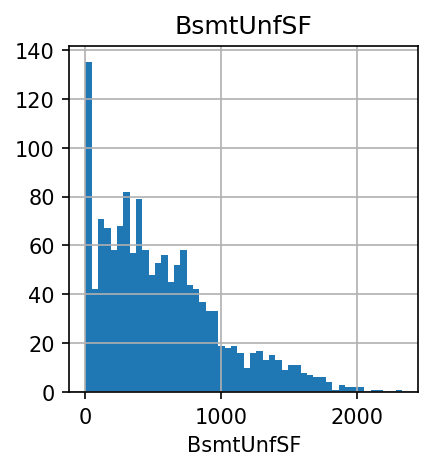

##### TotalBsmtSF ##### 

count   1449.000
mean    1056.170
std      438.425
min        0.000
5%       511.600
10%      635.600
20%      755.600
30%      840.000
40%      910.000
50%      991.000
60%     1087.600
70%     1214.600
80%     1389.400
90%     1602.000
95%     1752.600
99%     2155.600
max     6110.000
Name: TotalBsmtSF, dtype: float64


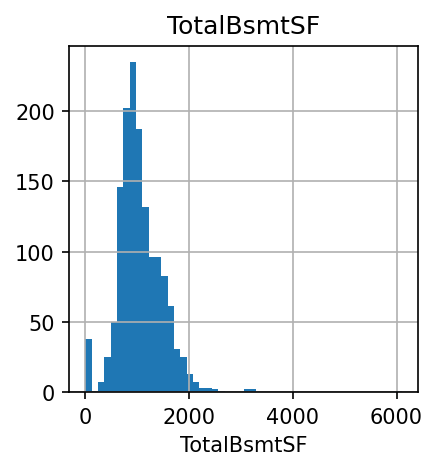

##### 1stFlrSF ##### 

count   1449.000
mean    1161.226
std      386.233
min      334.000
5%       672.400
10%      756.000
20%      848.000
30%      913.400
40%      999.000
50%     1086.000
60%     1180.800
70%     1312.400
80%     1480.200
90%     1680.000
95%     1829.800
99%     2220.120
max     4692.000
Name: 1stFlrSF, dtype: float64


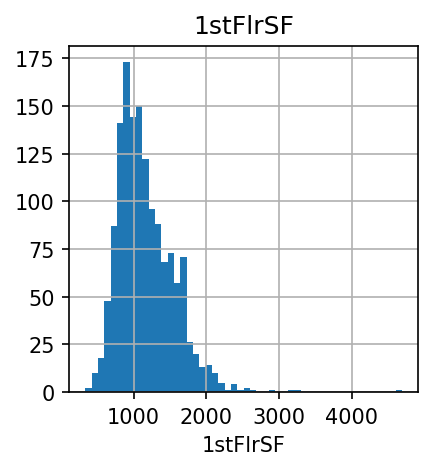

##### 2ndFlrSF ##### 

count   1449.000
mean     344.120
std      434.160
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%      448.000
70%      670.000
80%      795.000
90%      941.000
95%     1137.600
99%     1403.440
max     2065.000
Name: 2ndFlrSF, dtype: float64


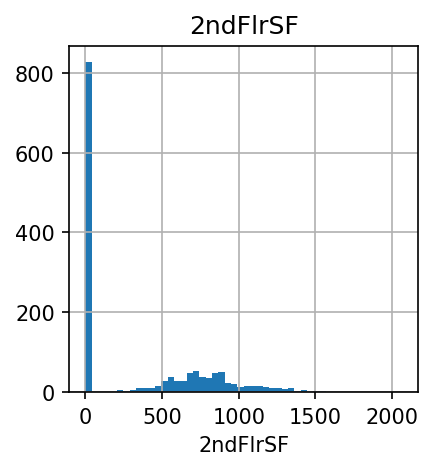

##### LowQualFinSF ##### 

count   1449.000
mean       5.747
std       48.523
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%        0.000
99%      360.000
max      572.000
Name: LowQualFinSF, dtype: float64


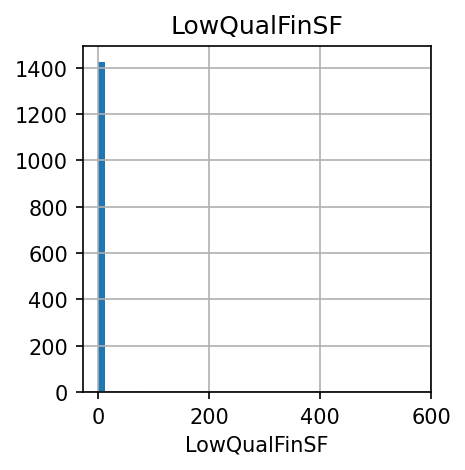

##### GrLivArea ##### 

count   1449.000
mean    1511.093
std      522.486
min      334.000
5%       848.000
10%      912.000
20%     1064.200
30%     1203.400
40%     1337.000
50%     1456.000
60%     1574.800
70%     1703.200
80%     1865.800
90%     2153.600
95%     2458.000
99%     3099.520
max     5642.000
Name: GrLivArea, dtype: float64


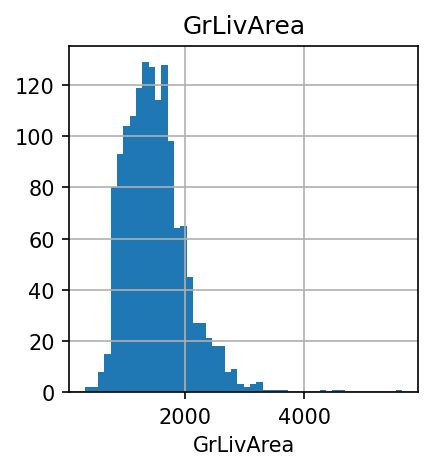

##### BsmtFullBath ##### 

count   1449.000
mean       0.425
std        0.516
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        1.000
70%        1.000
80%        1.000
90%        1.000
95%        1.000
99%        1.000
max        3.000
Name: BsmtFullBath, dtype: float64


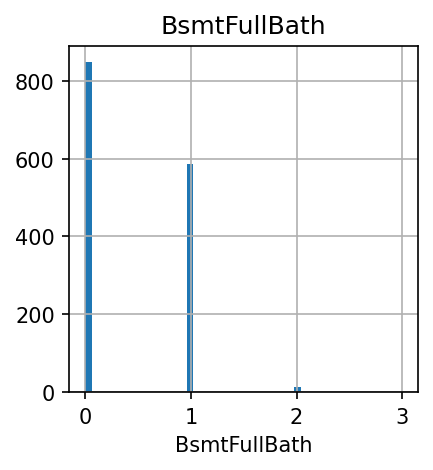

##### BsmtHalfBath ##### 

count   1449.000
mean       0.057
std        0.238
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%        1.000
99%        1.000
max        2.000
Name: BsmtHalfBath, dtype: float64


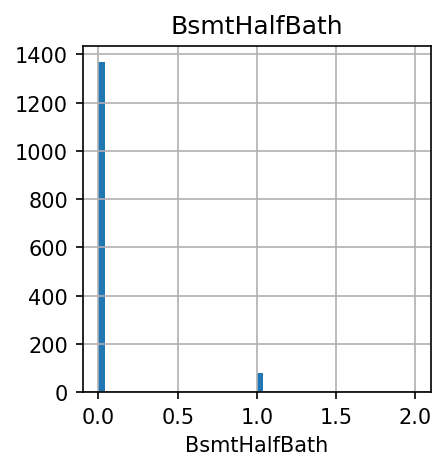

##### FullBath ##### 

count   1449.000
mean       1.564
std        0.550
min        0.000
5%         1.000
10%        1.000
20%        1.000
30%        1.000
40%        1.000
50%        2.000
60%        2.000
70%        2.000
80%        2.000
90%        2.000
95%        2.000
99%        3.000
max        3.000
Name: FullBath, dtype: float64


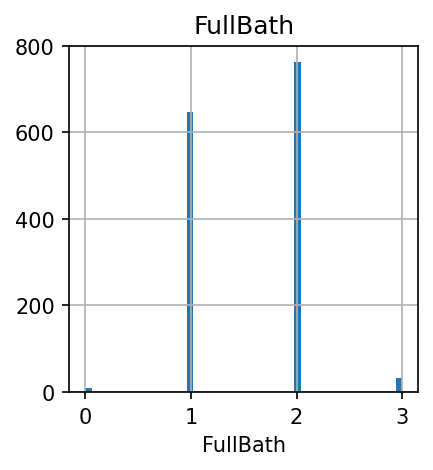

##### HalfBath ##### 

count   1449.000
mean       0.384
std        0.503
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        1.000
80%        1.000
90%        1.000
95%        1.000
99%        1.000
max        2.000
Name: HalfBath, dtype: float64


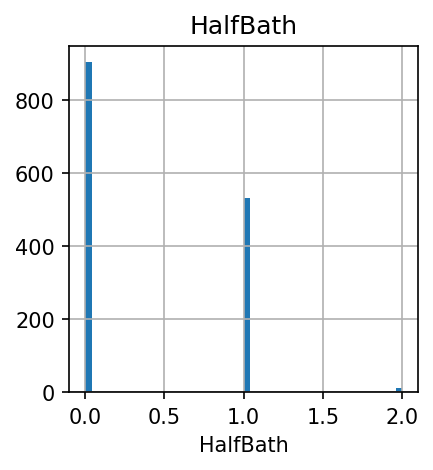

##### BedroomAbvGr ##### 

count   1449.000
mean       2.863
std        0.814
min        0.000
5%         2.000
10%        2.000
20%        2.000
30%        3.000
40%        3.000
50%        3.000
60%        3.000
70%        3.000
80%        3.000
90%        4.000
95%        4.000
99%        5.000
max        8.000
Name: BedroomAbvGr, dtype: float64


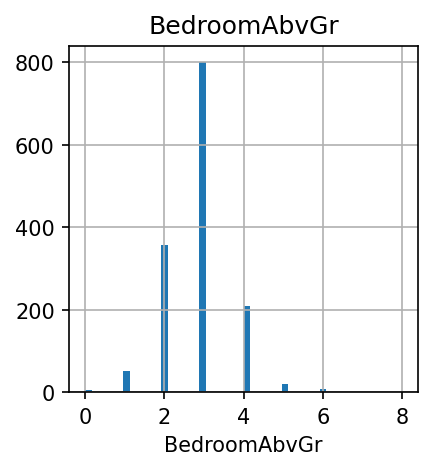

##### KitchenAbvGr ##### 

count   1449.000
mean       1.047
std        0.221
min        0.000
5%         1.000
10%        1.000
20%        1.000
30%        1.000
40%        1.000
50%        1.000
60%        1.000
70%        1.000
80%        1.000
90%        1.000
95%        1.000
99%        2.000
max        3.000
Name: KitchenAbvGr, dtype: float64


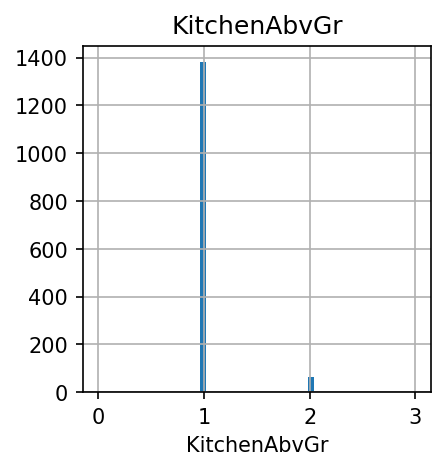

##### TotRmsAbvGrd ##### 

count   1449.000
mean       6.510
std        1.626
min        2.000
5%         4.000
10%        5.000
20%        5.000
30%        6.000
40%        6.000
50%        6.000
60%        7.000
70%        7.000
80%        8.000
90%        9.000
95%       10.000
99%       11.000
max       14.000
Name: TotRmsAbvGrd, dtype: float64


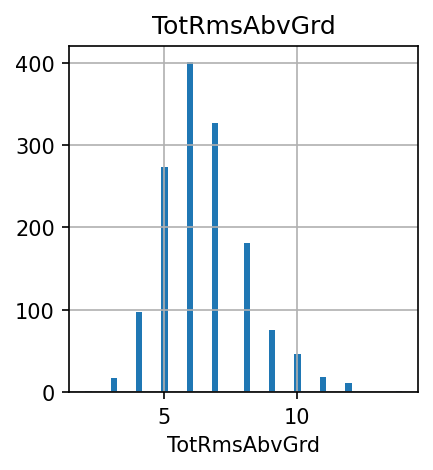

##### Fireplaces ##### 

count   1449.000
mean       0.610
std        0.642
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        1.000
60%        1.000
70%        1.000
80%        1.000
90%        1.000
95%        2.000
99%        2.000
max        3.000
Name: Fireplaces, dtype: float64


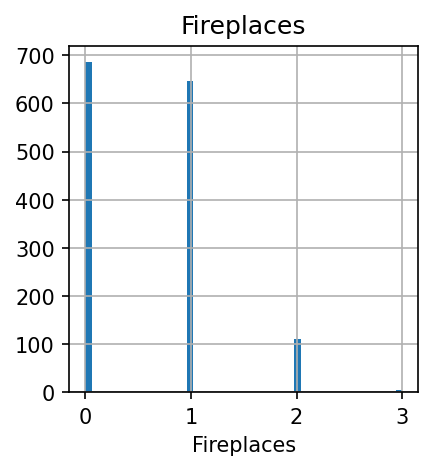

##### GarageYrBlt ##### 

count   1449.000
mean    1978.673
std       23.953
min     1900.000
5%      1930.000
10%     1948.000
20%     1958.000
30%     1966.000
40%     1975.200
50%     1979.000
60%     1991.000
70%     1998.000
80%     2003.000
90%     2006.000
95%     2007.000
99%     2009.000
max     2010.000
Name: GarageYrBlt, dtype: float64


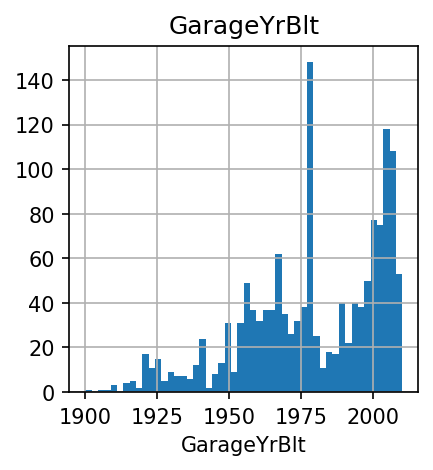

##### GarageCars ##### 

count   1449.000
mean       1.767
std        0.744
min        0.000
5%         0.000
10%        1.000
20%        1.000
30%        1.000
40%        2.000
50%        2.000
60%        2.000
70%        2.000
80%        2.000
90%        3.000
95%        3.000
99%        3.000
max        4.000
Name: GarageCars, dtype: float64


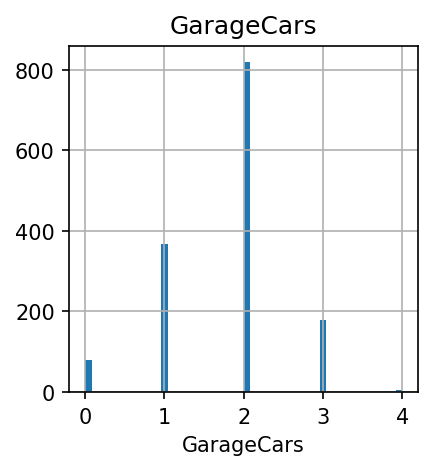

##### GarageArea ##### 

count   1449.000
mean     473.277
std      213.050
min        0.000
5%         0.000
10%      240.000
20%      296.600
30%      384.000
40%      440.000
50%      480.000
60%      516.000
70%      560.000
80%      619.400
90%      756.200
95%      845.200
99%     1004.880
max     1418.000
Name: GarageArea, dtype: float64


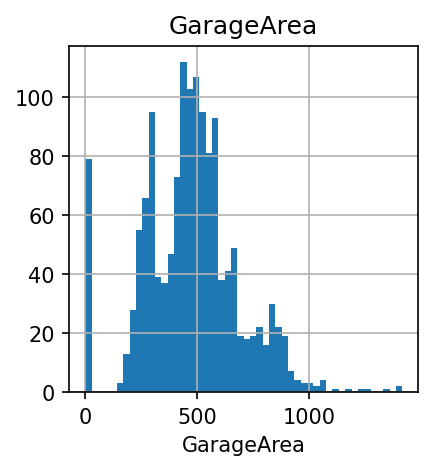

##### WoodDeckSF ##### 

count   1449.000
mean      93.902
std      124.361
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%      100.000
70%      144.000
80%      192.000
90%      261.000
95%      331.000
99%      501.560
max      857.000
Name: WoodDeckSF, dtype: float64


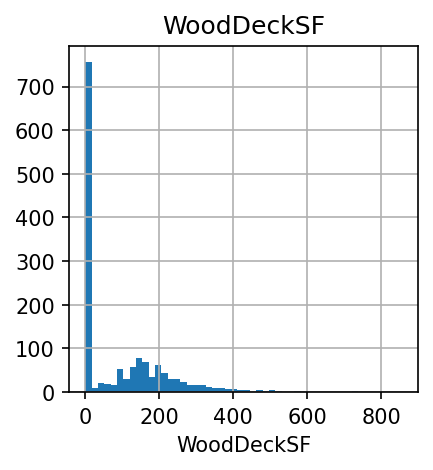

##### OpenPorchSF ##### 

count   1449.000
mean      46.727
std       66.347
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%       25.000
60%       40.000
70%       57.000
80%       83.400
90%      130.000
95%      175.600
99%      286.040
max      547.000
Name: OpenPorchSF, dtype: float64


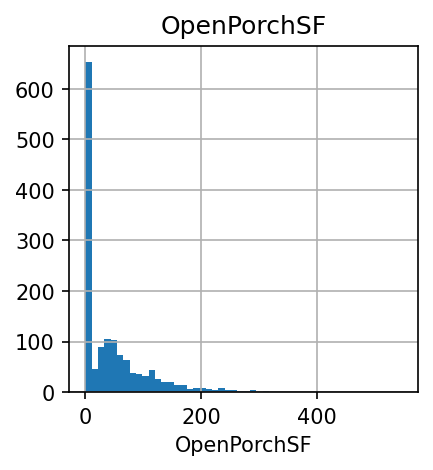

##### EnclosedPorch ##### 

count   1449.000
mean      21.517
std       60.023
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%      112.000
95%      178.800
99%      253.040
max      552.000
Name: EnclosedPorch, dtype: float64


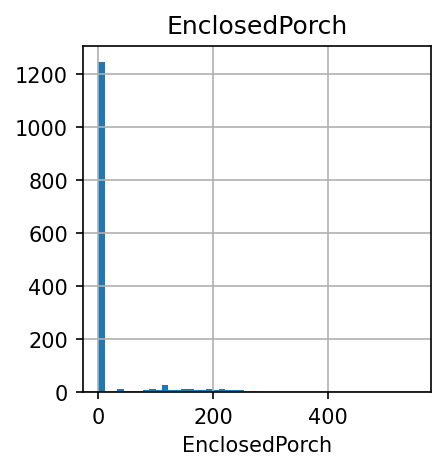

##### 3SsnPorch ##### 

count   1449.000
mean       3.435
std       29.427
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%        0.000
99%      168.000
max      508.000
Name: 3SsnPorch, dtype: float64


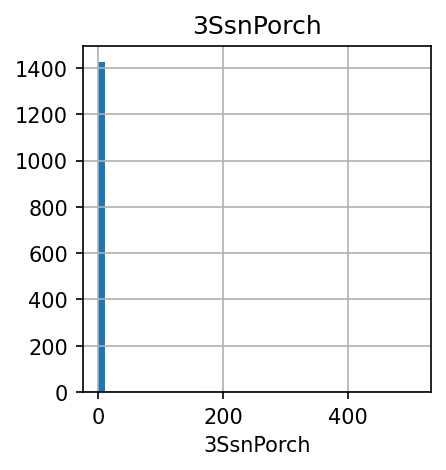

##### ScreenPorch ##### 

count   1449.000
mean      15.175
std       55.953
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%      160.000
99%      268.600
max      480.000
Name: ScreenPorch, dtype: float64


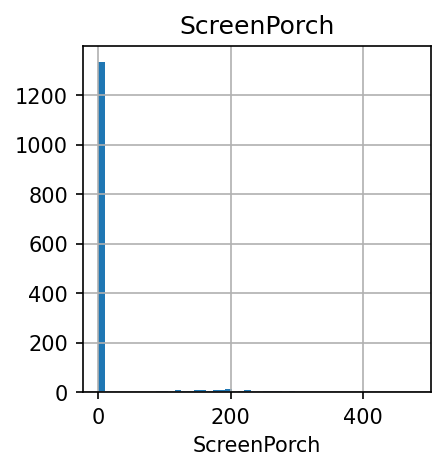

##### PoolArea ##### 

count   1449.000
mean       2.780
std       40.329
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%        0.000
99%        0.000
max      738.000
Name: PoolArea, dtype: float64


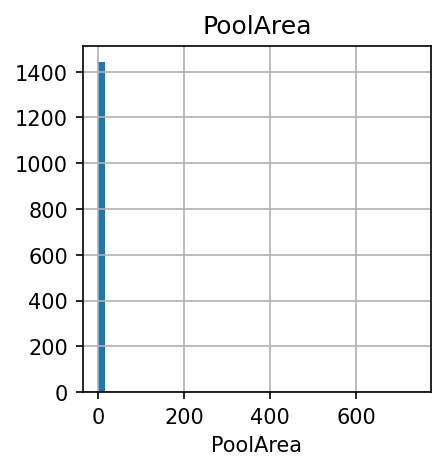

##### MiscVal ##### 

count    1449.000
mean       42.991
std       497.548
min         0.000
5%          0.000
10%         0.000
20%         0.000
30%         0.000
40%         0.000
50%         0.000
60%         0.000
70%         0.000
80%         0.000
90%         0.000
95%         0.000
99%       700.000
max     15500.000
Name: MiscVal, dtype: float64


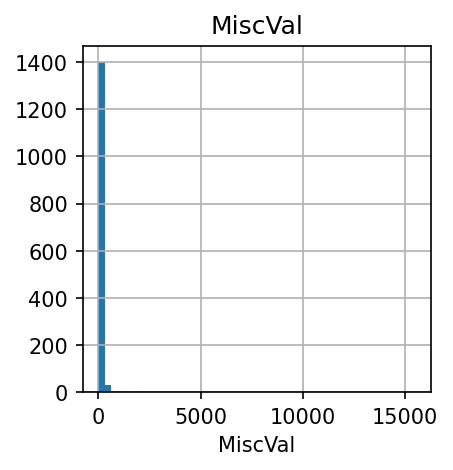

##### MoSold ##### 

count   1449.000
mean       6.318
std        2.706
min        1.000
5%         2.000
10%        3.000
20%        4.000
30%        5.000
40%        6.000
50%        6.000
60%        7.000
70%        7.000
80%        8.000
90%       10.000
95%       11.000
99%       12.000
max       12.000
Name: MoSold, dtype: float64


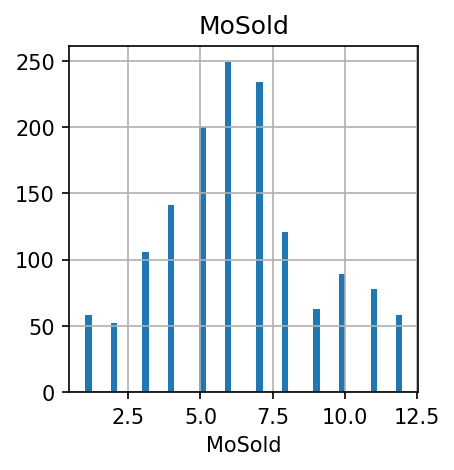

##### YrSold ##### 

count   1449.000
mean    2007.814
std        1.329
min     2006.000
5%      2006.000
10%     2006.000
20%     2006.000
30%     2007.000
40%     2007.000
50%     2008.000
60%     2008.000
70%     2009.000
80%     2009.000
90%     2010.000
95%     2010.000
99%     2010.000
max     2010.000
Name: YrSold, dtype: float64


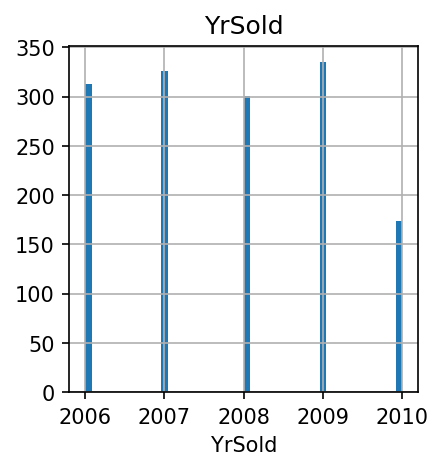

In [11]:
# Analysis of Numerical Variables
def num_summary(df, numerical_col, plot=True):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print('##### ' + numerical_col + ' ##### \n')
    print(df[numerical_col].describe(quantiles).T)

    if plot:
        df[numerical_col].hist(bins=50)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()
for col in num_cols:
    if col != 'SalePrice':
        num_summary(data, col, True)

In [12]:
# Analysis of Target Variable
def target_summary_with_cat(df, target, categorical_col):
    print(pd.DataFrame({"SalePrice Mean": df.groupby(categorical_col)[target].mean()}), end="\n\n\n")

for col in cat_cols:
    target_summary_with_cat(data,"SalePrice",col)

          SalePrice Mean
MSZoning                
C (all)        74528.000
FV            214014.062
RH            131558.375
RL            190724.083
RM            124738.632


        SalePrice Mean
Street                
Grvl        110438.600
Pave        180902.579


          SalePrice Mean
LotShape                
IR1           205930.035
IR2           237286.359
IR3           198373.889
Reg           164828.843


             SalePrice Mean
LandContour                
Bnk              143104.079
HLS              231586.673
Low              193266.667
Lvl              180241.114


           SalePrice Mean
Utilities                
AllPub         180689.238
NoSeWa         137500.000


           SalePrice Mean
LotConfig                
Corner         181390.085
CulDSac        222427.543
FR2            177934.574
FR3            208475.000
Inside         176824.571


           SalePrice Mean
LandSlope                
Gtl            180010.049
Mod            196734.138
Sev          

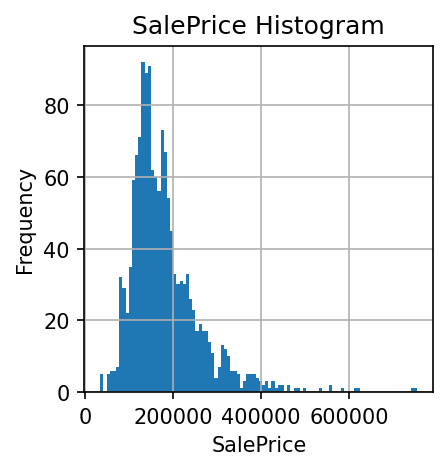

In [13]:
#Exploration of the Target Variable
_ = data["SalePrice"].hist(bins=100)
_ = plt.title('SalePrice Histogram')
_ = plt.xlabel('SalePrice')
_ = plt.ylabel('Frequency')
plt.show()

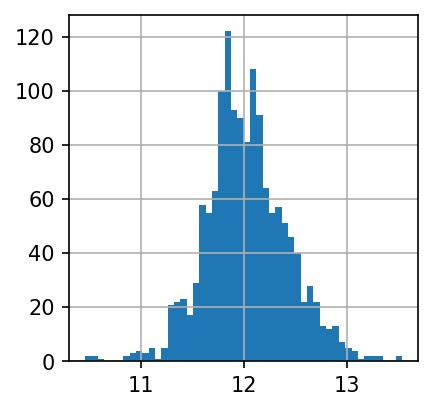

In [14]:
# Explore the logarithm of the target variable.
_= np.log1p(data['SalePrice']).hist(bins=50)
plt.show()

In [15]:
# Analysis of Correlation
corr = data[num_cols].corr()
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000,-0.359,-0.273,0.035,-0.063,0.033,0.043,0.026,-0.071,-0.065,-0.142,-0.240,-0.254,0.309,0.046,0.073,0.000,-0.001,0.132,0.179,-0.026,0.283,0.038,-0.048,0.083,-0.041,-0.100,-0.022,-0.005,-0.014,-0.044,-0.026,0.008,-0.010,-0.016,-0.022,-0.084
LotFrontage,-0.359,1.000,0.451,0.233,-0.057,0.123,0.088,0.182,0.213,0.031,0.126,0.360,0.413,0.073,0.041,0.369,0.085,-0.006,0.180,0.047,0.236,-0.004,0.320,0.229,0.069,0.270,0.325,0.079,0.137,0.017,0.063,0.039,0.182,0.000,0.010,0.003,0.332
LotArea,-0.273,0.451,1.000,0.178,-0.027,0.046,0.037,0.155,0.273,0.075,0.037,0.349,0.417,0.111,0.020,0.403,0.150,0.028,0.164,0.081,0.193,-0.016,0.314,0.320,0.001,0.248,0.299,0.222,0.166,-0.005,0.045,0.097,0.143,0.029,-0.003,-0.032,0.353
OverallQual,0.035,0.233,0.178,1.000,-0.095,0.593,0.553,0.410,0.242,-0.061,0.309,0.540,0.478,0.294,-0.034,0.595,0.113,-0.040,0.553,0.274,0.099,-0.184,0.428,0.399,0.522,0.605,0.566,0.244,0.308,-0.115,0.031,0.066,0.065,-0.031,0.068,-0.029,0.795
OverallCond,-0.063,-0.057,-0.027,-0.095,1.000,-0.371,0.069,-0.126,-0.042,0.044,-0.146,-0.174,-0.146,0.019,0.028,-0.090,-0.050,0.117,-0.197,-0.063,0.012,-0.087,-0.065,-0.028,-0.308,-0.194,-0.157,-0.006,-0.034,0.063,0.026,0.057,-0.002,0.069,-0.005,0.039,-0.082
YearBuilt,0.033,0.123,0.046,0.593,-0.371,1.000,0.611,0.312,0.245,-0.054,0.164,0.400,0.289,0.034,-0.181,0.225,0.182,-0.042,0.483,0.245,-0.059,-0.182,0.112,0.149,0.789,0.551,0.486,0.230,0.192,-0.379,0.030,-0.056,0.004,-0.036,0.017,-0.010,0.537
YearRemodAdd,0.043,0.088,0.037,0.553,0.069,0.611,1.000,0.175,0.131,-0.064,0.180,0.294,0.243,0.139,-0.063,0.289,0.125,-0.015,0.443,0.184,-0.039,-0.150,0.193,0.113,0.621,0.423,0.373,0.209,0.227,-0.205,0.045,-0.039,0.006,-0.010,0.022,0.036,0.510
MasVnrArea,0.026,0.182,0.155,0.410,-0.126,0.312,0.175,1.000,0.260,-0.070,0.116,0.361,0.341,0.179,-0.068,0.395,0.084,0.021,0.274,0.201,0.105,-0.039,0.285,0.246,0.246,0.365,0.373,0.162,0.121,-0.107,0.019,0.062,0.012,-0.031,-0.006,-0.006,0.474
BsmtFinSF1,-0.071,0.213,0.273,0.242,-0.042,0.245,0.131,0.260,1.000,-0.058,-0.493,0.521,0.444,-0.131,-0.064,0.213,0.646,0.067,0.056,0.006,-0.105,-0.081,0.048,0.254,0.150,0.226,0.297,0.200,0.113,-0.095,0.027,0.062,0.141,0.001,-0.016,0.015,0.384
BsmtFinSF2,-0.065,0.031,0.075,-0.061,0.044,-0.054,-0.064,-0.070,-0.058,1.000,-0.207,0.098,0.091,-0.096,0.016,-0.011,0.149,0.073,-0.080,-0.030,-0.015,-0.041,-0.038,0.040,-0.088,-0.040,-0.020,0.070,0.006,0.041,-0.030,0.090,0.042,0.005,-0.015,0.029,-0.020


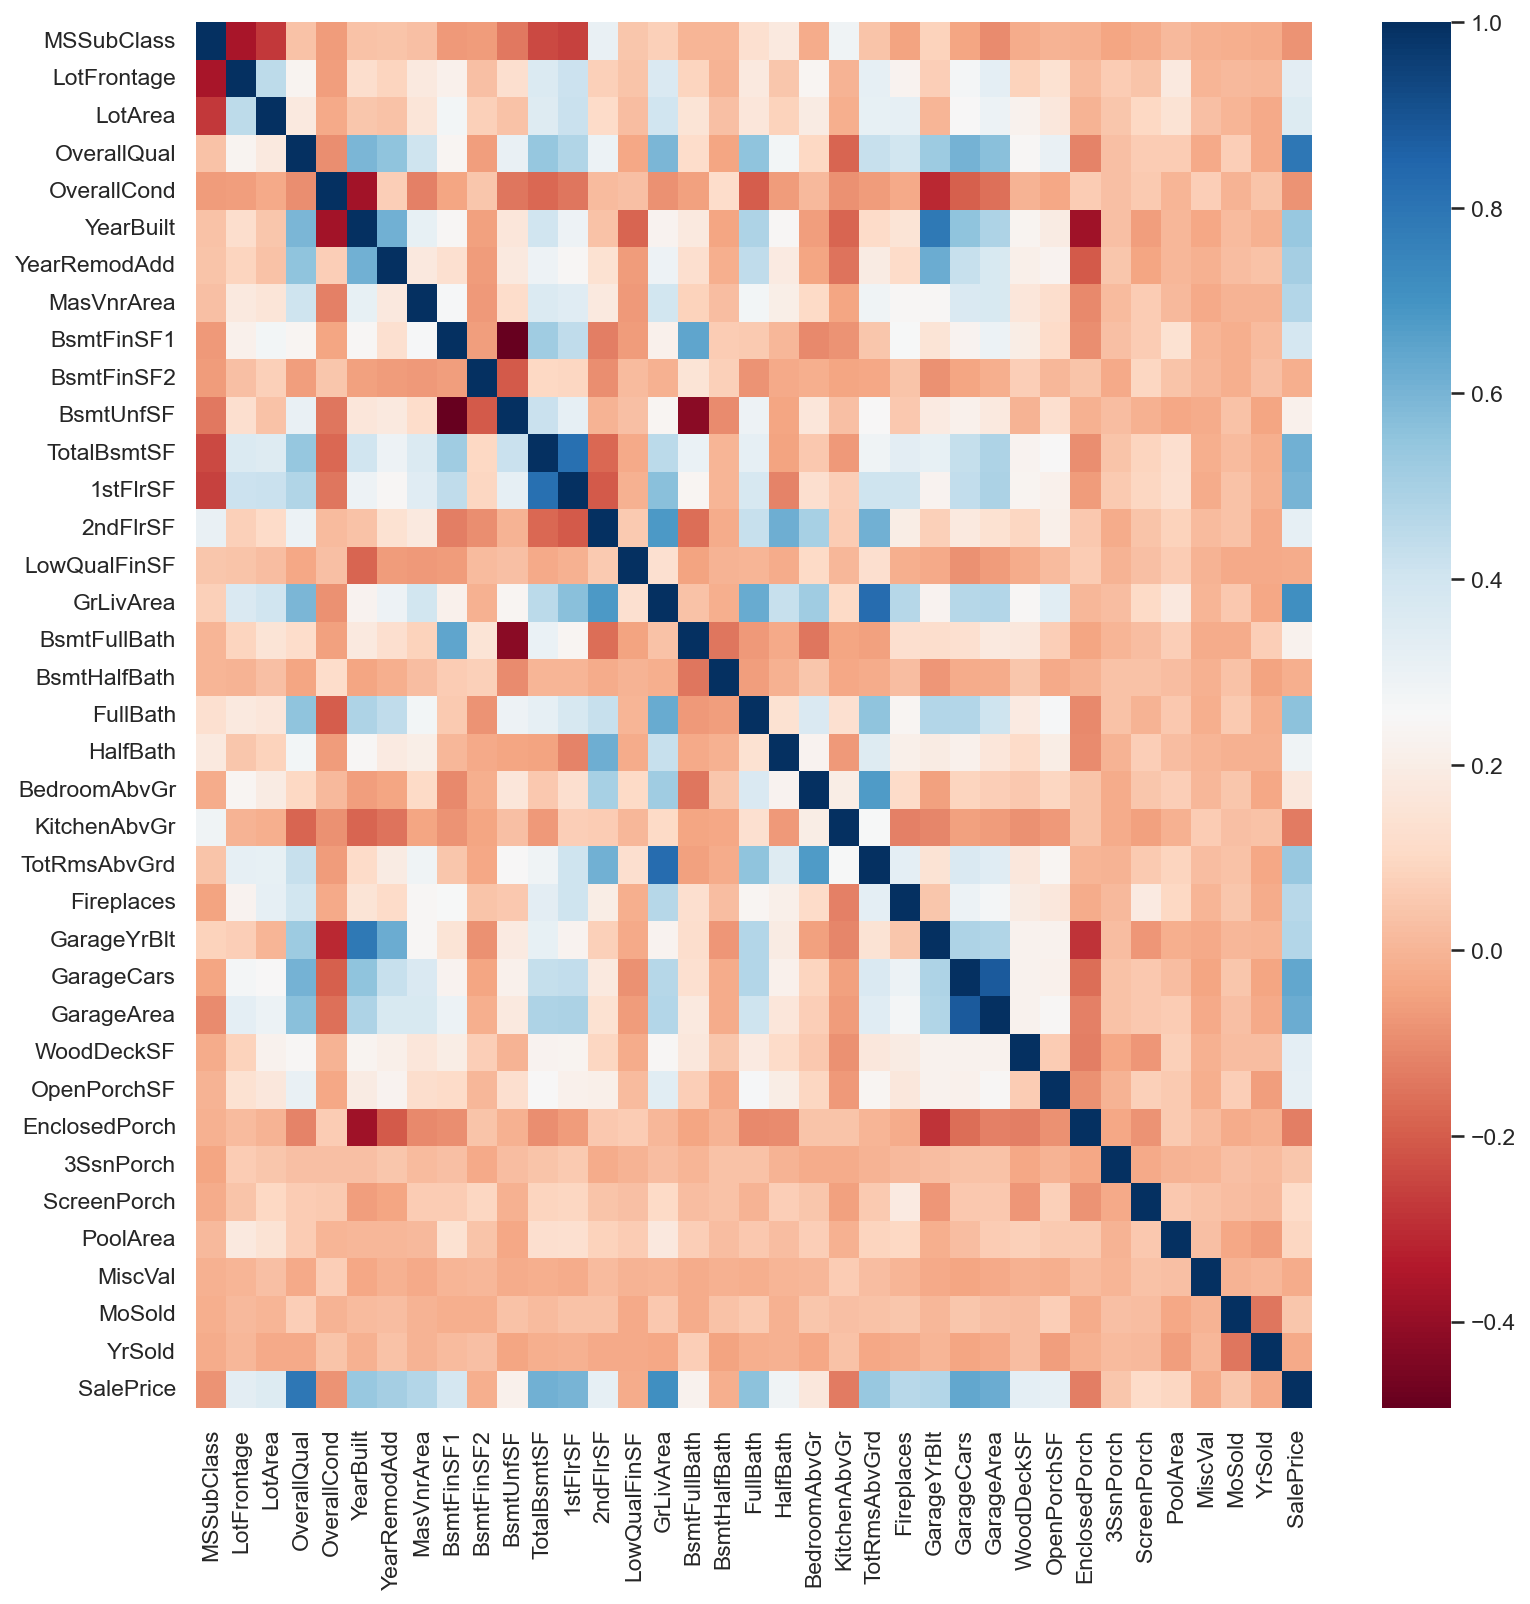

In [16]:
# Plotting of Correlation
_= sns.set(rc={'figure.figsize': (12, 12)})
_= sns.heatmap(corr, cmap="RdBu")
plt.show()

In [17]:
#To identify columns with high correlation. Specified correlation threshold (0.70)"
def high_correlated_cols(df, corr_th=0.70):
    corr = df.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    
    return drop_list

high_correlated_cols(data[num_cols])

['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'SalePrice']

In [18]:
#Calculate Outlier Thresholds
def outlier_thresholds(df, col):
    Q1 = df[col].quantile(0.10)
    Q3 = df[col].quantile(0.90)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

In [19]:
#Outlier Detection
def check_outlier(df, col_name):
    lower_bound, upper_bound = outlier_thresholds(df, col_name)
    if df[(df[col_name] > upper_bound) | (df[col_name] < lower_bound)].any(axis=None):
        return True
    else:
        return False

In [20]:
for i, col in enumerate(num_cols):
    if col != "SalePrice":
      print(i+1, ': ', col, check_outlier(data, col))

1 :  MSSubClass False
2 :  LotFrontage True
3 :  LotArea True
4 :  OverallQual False
5 :  OverallCond True
6 :  YearBuilt False
7 :  YearRemodAdd False
8 :  MasVnrArea True
9 :  BsmtFinSF1 True
10 :  BsmtFinSF2 True
11 :  BsmtUnfSF False
12 :  TotalBsmtSF True
13 :  1stFlrSF True
14 :  2ndFlrSF False
15 :  LowQualFinSF True
16 :  GrLivArea True
17 :  BsmtFullBath True
18 :  BsmtHalfBath True
19 :  FullBath False
20 :  HalfBath False
21 :  BedroomAbvGr True
22 :  KitchenAbvGr True
23 :  TotRmsAbvGrd False
24 :  Fireplaces True
25 :  GarageYrBlt False
26 :  GarageCars False
27 :  GarageArea False
28 :  WoodDeckSF True
29 :  OpenPorchSF True
30 :  EnclosedPorch True
31 :  3SsnPorch True
32 :  ScreenPorch True
33 :  PoolArea True
34 :  MiscVal True
35 :  MoSold False
36 :  YrSold False


In [21]:
#Suppressing Outliers
def replace_with_thresholds(df, var):
    lower_bound, upper_bound = outlier_thresholds(df, var)
    df.loc[(df[var] < lower_bound), var] = int(lower_bound)
    df.loc[(df[var] > upper_bound), var] = int(upper_bound)

In [22]:
for col in num_cols:
    if col != "SalePrice":
        replace_with_thresholds(data, col)

In [23]:
for i, col in enumerate(num_cols):
    if col != "SalePrice":
      print(i+1, ': ', col, check_outlier(data, col))
        

1 :  MSSubClass False
2 :  LotFrontage False
3 :  LotArea False
4 :  OverallQual False
5 :  OverallCond False
6 :  YearBuilt False
7 :  YearRemodAdd False
8 :  MasVnrArea False
9 :  BsmtFinSF1 False
10 :  BsmtFinSF2 False
11 :  BsmtUnfSF False
12 :  TotalBsmtSF False
13 :  1stFlrSF False
14 :  2ndFlrSF False
15 :  LowQualFinSF False
16 :  GrLivArea False
17 :  BsmtFullBath False
18 :  BsmtHalfBath False
19 :  FullBath False
20 :  HalfBath False
21 :  BedroomAbvGr False
22 :  KitchenAbvGr False
23 :  TotRmsAbvGrd False
24 :  Fireplaces False
25 :  GarageYrBlt False
26 :  GarageCars False
27 :  GarageArea False
28 :  WoodDeckSF False
29 :  OpenPorchSF False
30 :  EnclosedPorch False
31 :  3SsnPorch False
32 :  ScreenPorch False
33 :  PoolArea False
34 :  MiscVal False
35 :  MoSold False
36 :  YrSold False


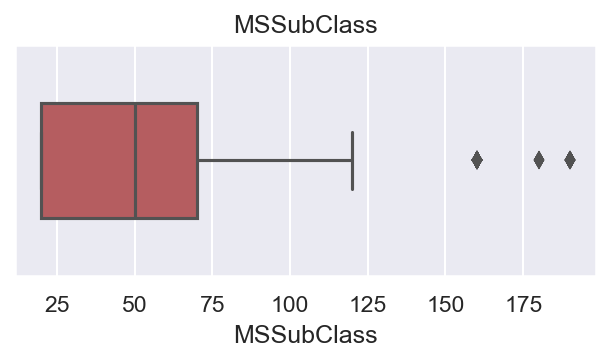

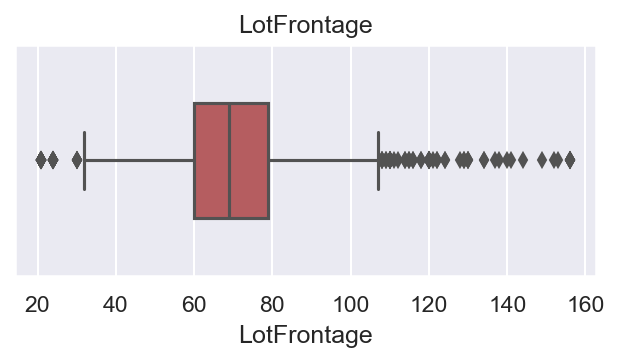

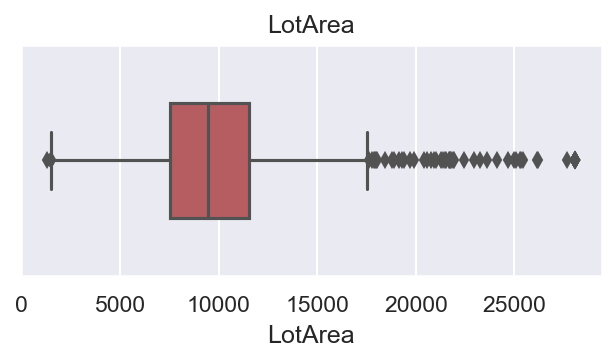

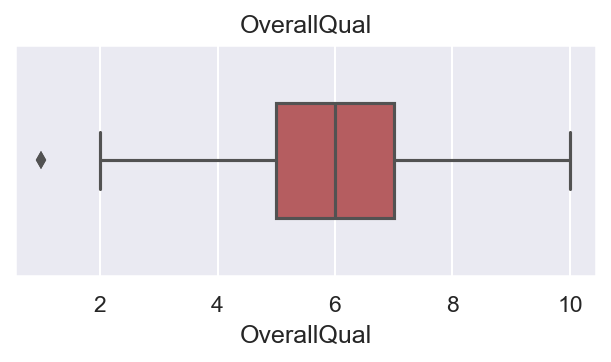

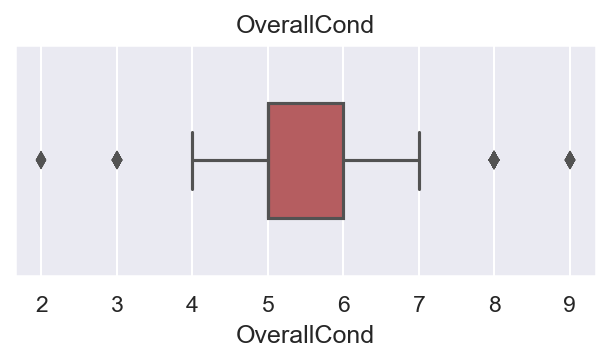

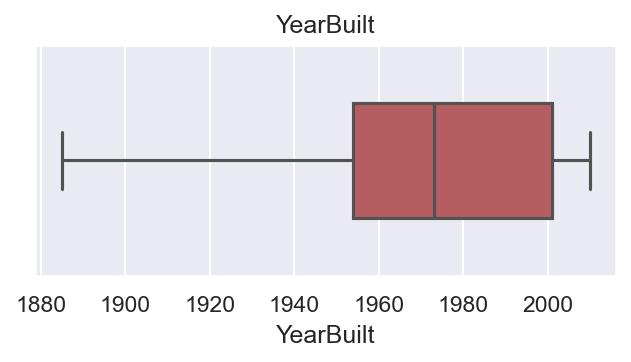

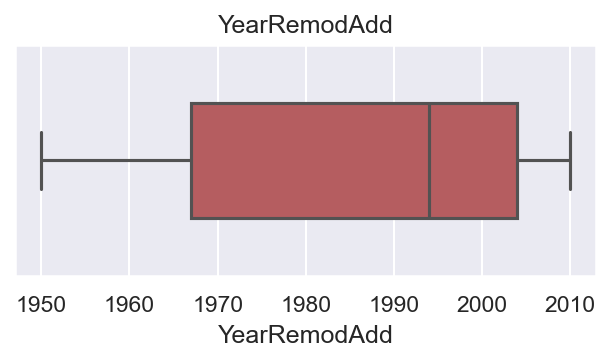

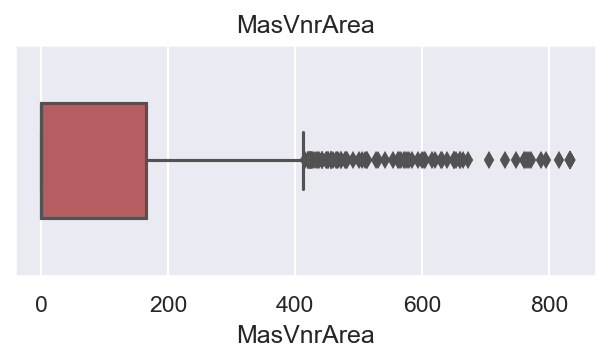

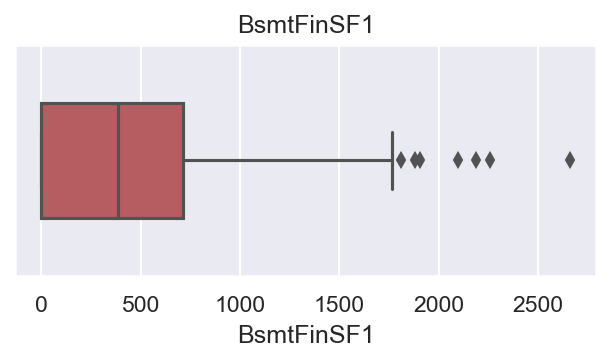

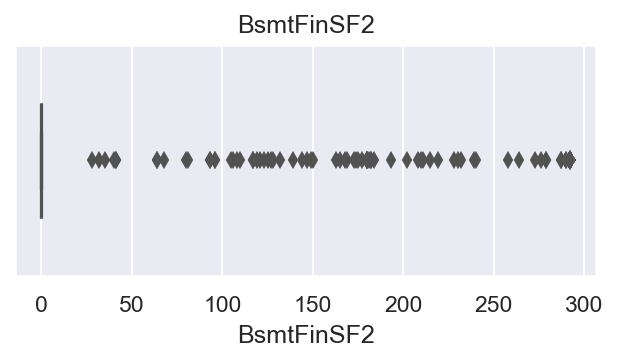

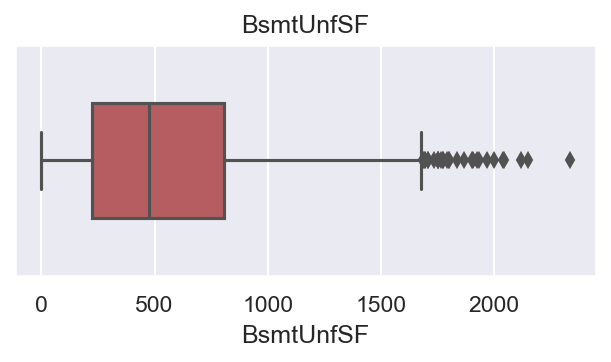

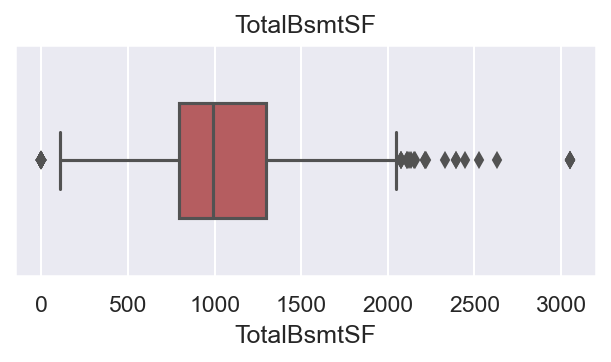

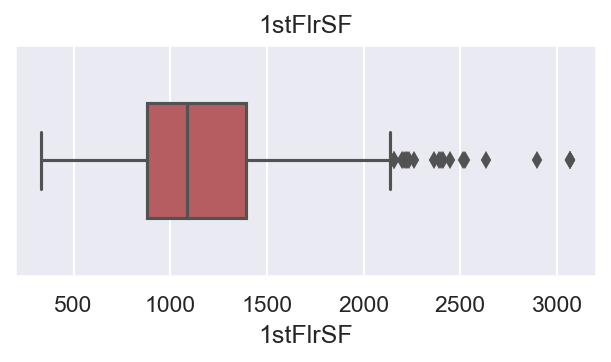

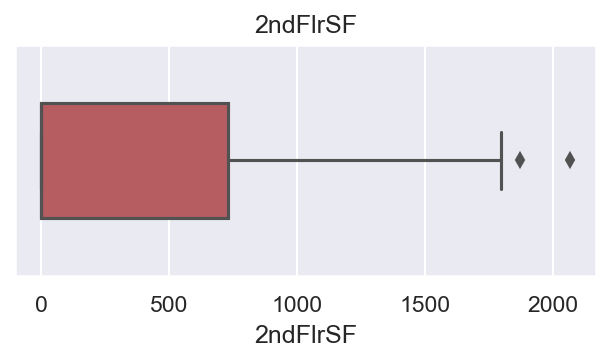

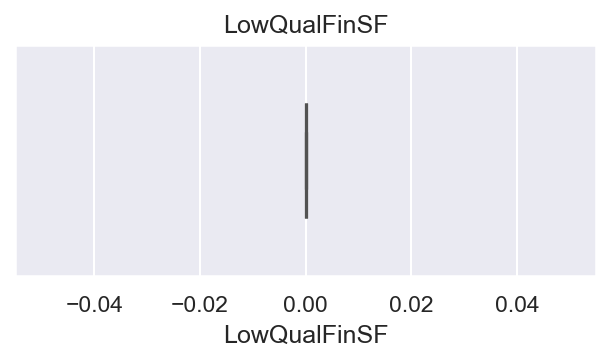

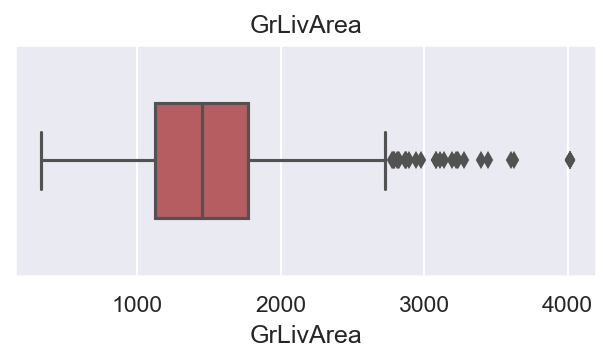

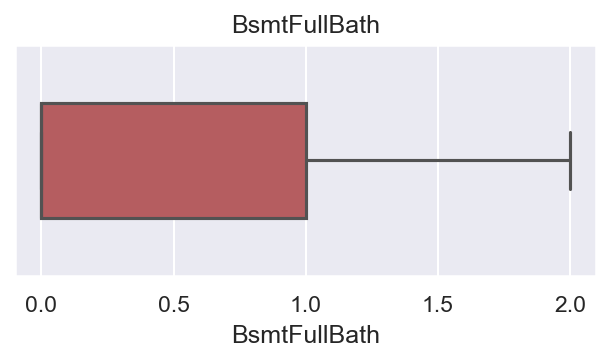

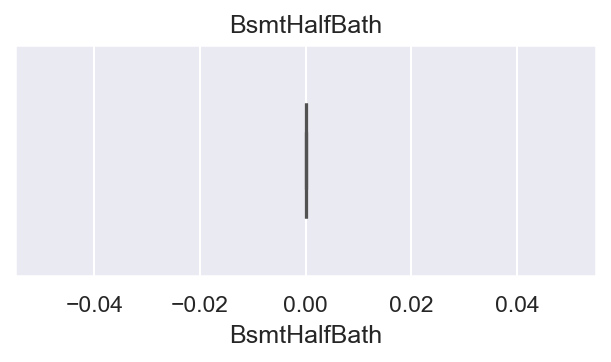

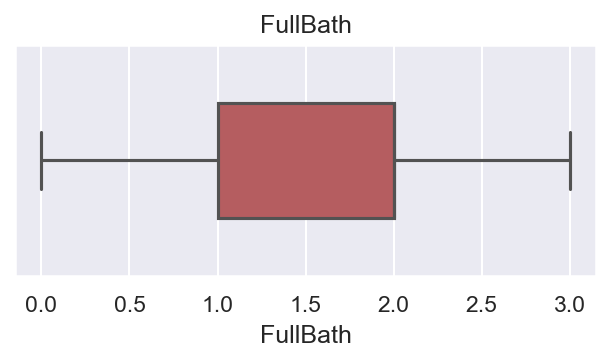

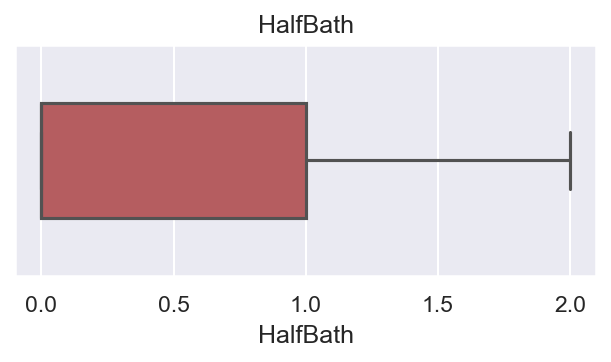

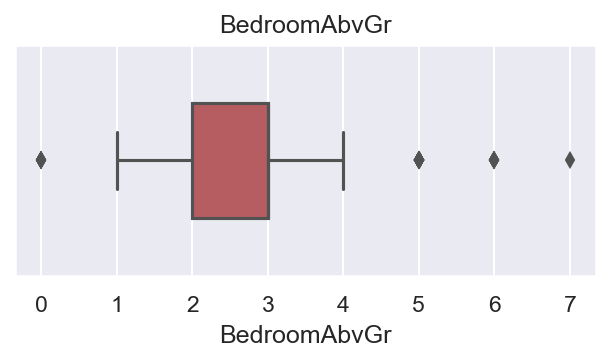

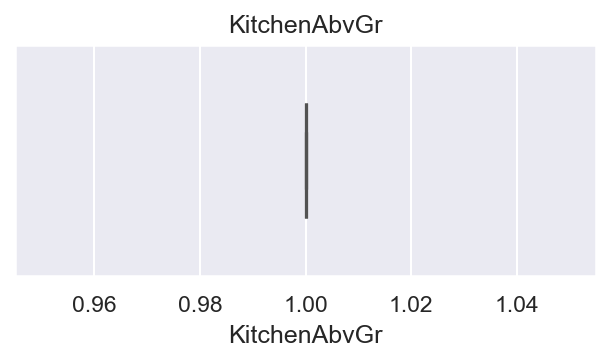

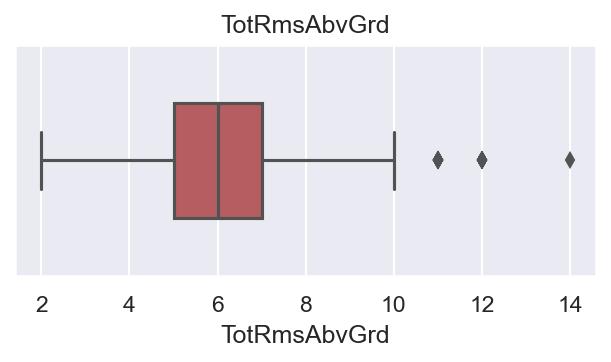

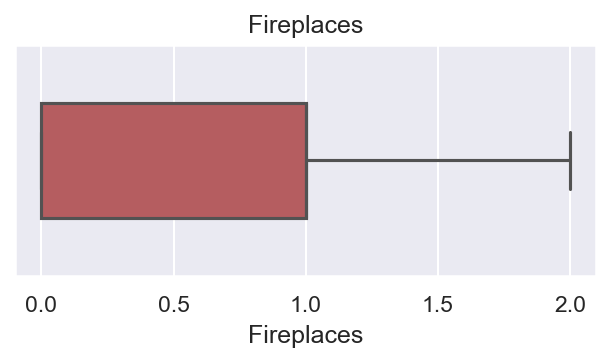

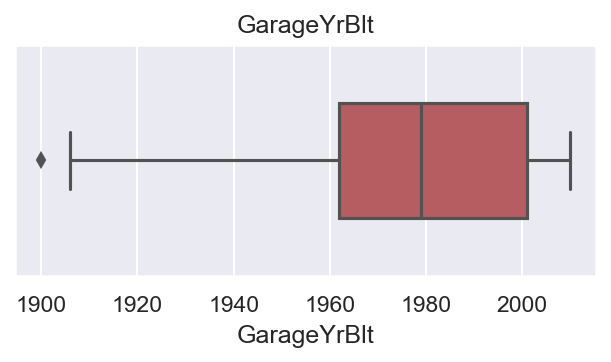

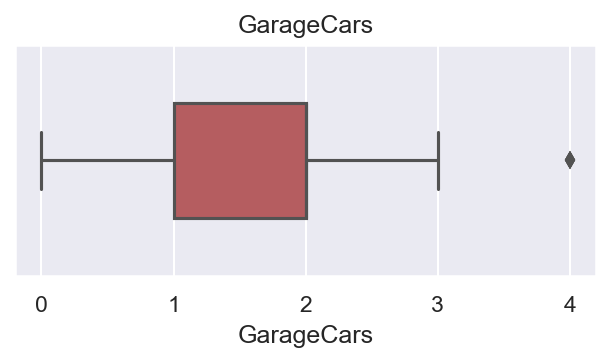

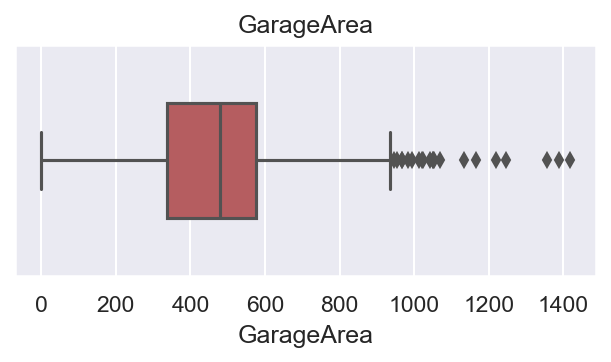

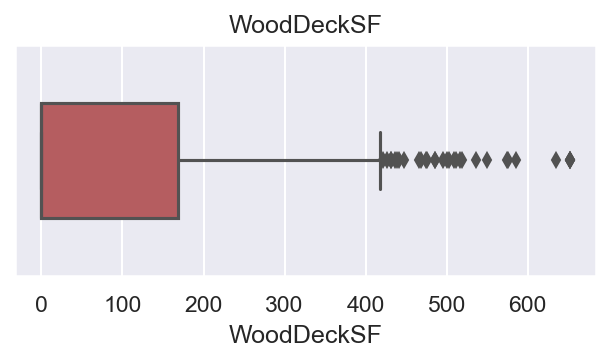

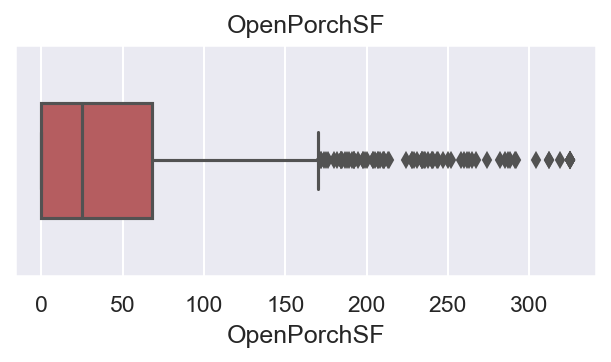

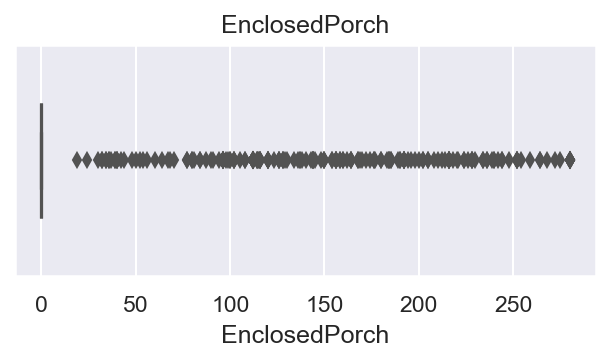

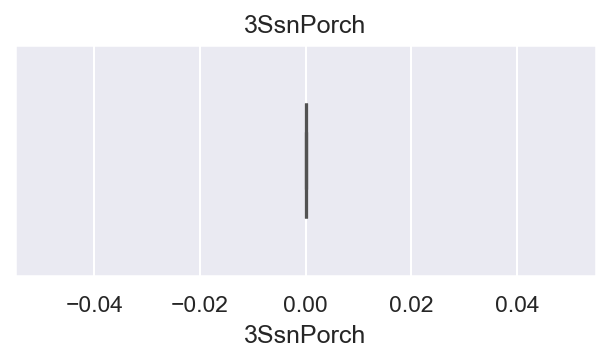

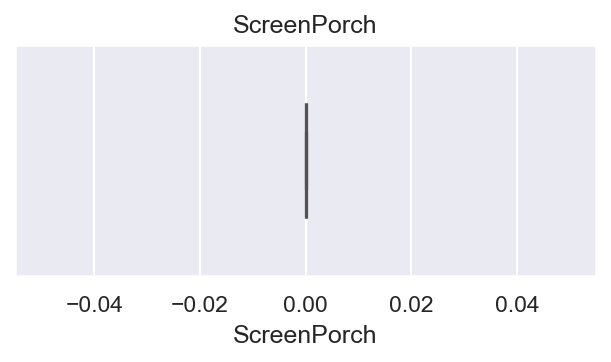

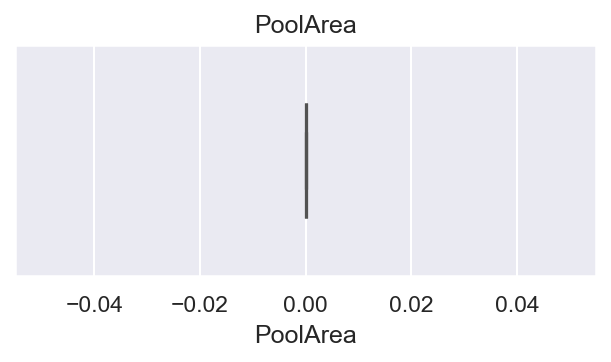

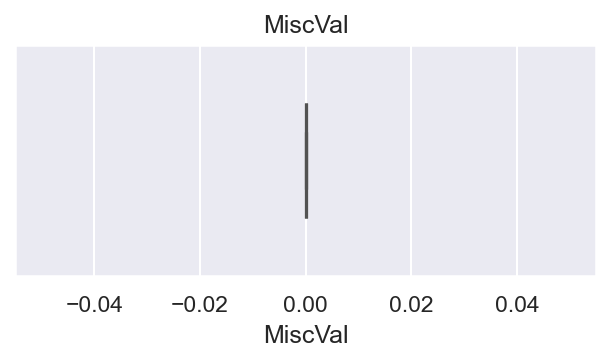

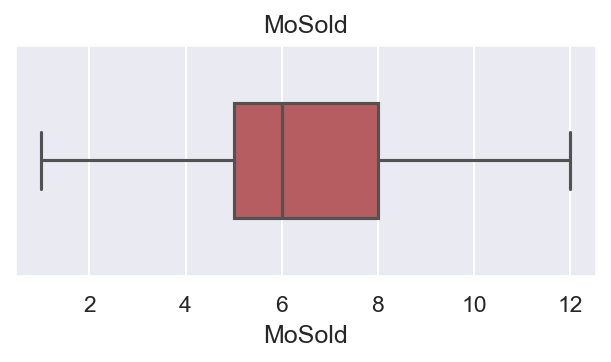

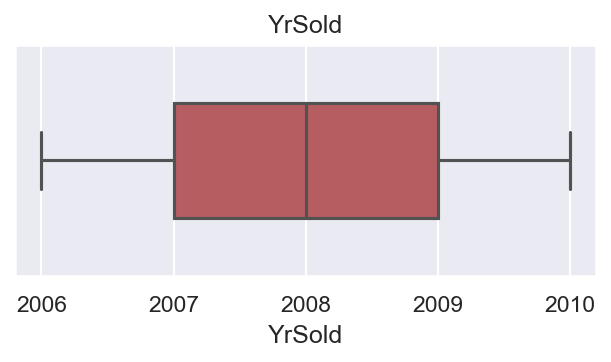

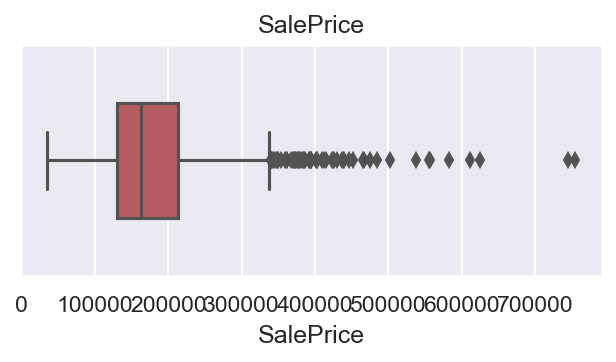

In [24]:
#Visualize Boxplots for Numerical Columns
for col in num_cols:
    _= plt.figure(figsize=(5, 2))
    _= plt.xlabel(col)
    _= plt.title(col)
    _= plt.grid(True)
    _= sns.boxplot(x = data[col], color = 'r', orient = 'h',  width = 0.5)
    plt.show()

In [25]:
# Categorical Summary with Target Mean
def cat_summary_target_mean(df, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(df[col].value_counts()))
        print(pd.DataFrame({"Count": df[col].value_counts(),
                            "Ratio %": df[col].value_counts() / len(df),
                            "Target mean": df.groupby(col)[target].mean()}), end="\n\n\n")

cat_summary_target_mean(data, "SalePrice", cat_cols)

MSZoning : 5
          Count  Ratio %  Target mean
MSZoning                             
C (all)      10    0.007    74528.000
FV           65    0.045   214014.062
RH           16    0.011   131558.375
RL         1146    0.791   190724.083
RM          212    0.146   124738.632


Street : 2
        Count  Ratio %  Target mean
Street                             
Grvl        5    0.003   110438.600
Pave     1444    0.997   180902.579


LotShape : 4
          Count  Ratio %  Target mean
LotShape                             
IR1         482    0.333   205930.035
IR2          39    0.027   237286.359
IR3           9    0.006   198373.889
Reg         919    0.634   164828.843


LandContour : 4
             Count  Ratio %  Target mean
LandContour                             
Bnk             63    0.043   143104.079
HLS             49    0.034   231586.673
Low             33    0.023   193266.667
Lvl           1304    0.900   180241.114


Utilities : 2
           Count  Ratio %  Target mean
Ut

In [26]:
# Save the DataFrame as a CSV file
data.to_csv('E:/Springboard Data Scientist BootCamp/PYTHON/GITHUB/HousePricePrediction/Data/EDA.csv', index=False)

## Conclusion: Exploratory Data Analysis Summary
In this exploratory data analysis (EDA) journey, we embarked on a comprehensive examination of the dataset to glean insights and prepare it for modeling endeavors.

Categorical Variables Analysis:

We meticulously scrutinized each categorical variable, presenting their distributions and frequencies through tabular summaries and count plots. This allowed us to understand the composition and variability within each categorical feature.

Numerical Variables Analysis:

Through descriptive statistics and visualizations like histograms, we delved into the characteristics of numerical variables. This provided a deeper understanding of their distributions and helped identify any potential outliers.

Target Variable Exploration:

The target variable, SalePrice, was thoroughly examined to comprehend its distribution and variation across different categorical variables. Understanding SalePrice dynamics is crucial for building predictive models.

Correlation Analysis:

We investigated correlations between numerical variables, visualizing them using heatmaps. This enabled us to identify highly correlated variables, which may influence model performance and feature selection.

Outlier Detection and Treatment:

Employing outlier detection techniques, we identified and addressed outliers in numerical columns, ensuring data integrity and model robustness.

In conclusion, our EDA provided invaluable insights into the dataset's characteristics, laying a solid foundation for subsequent data preprocessing and modeling endeavors. The cleaned and enriched dataset is now primed for advanced analytics and predictive modeling, where we can leverage these insights to build accurate and robust models.